# *PROJETO FINAL*

**Empresa: Everything Plus**

**Ramo: E-commerce**
 
**Objetivo do Projeto: Segmentação de usuários com base em seu perfil consumidor, afim de obter insights de negócios.**

# 1. Possíveis interessados

 - Equipe de Marketing
 - Gerentes de Produtos / Negócios
  

# 2. Utilização

 - Oferecer produtos mais direcionados aos perfis dos clientes
 - Campanhas de Marketing mais assertivas

# 3. Como será feito

# 3.1 Verificando na base de dados informações como:
 
   1. data da última compra (RFM)
   2. data do último acesso à plataforma
   3. quantidade de acessos diários e semanais até a efetivação da compra
   4. quanto os usuários gastaram em média em suas últimas compras
   5. taxa de conversão (novos clientes)
   6. tempo até a primeira compra desde o primeiro acesso
   7. receita média dos novos clientes
   8. retorno do investimento em marketing

# 4. Execução

# 4.1 Pré-processamento dos Dados

1. verificar integridade dos dados
2. tipo de dado de cada variável
3. dados nulos e faltantes
4. organização e renomeação das colunas
5. amplitude das variáveis numéricas e tipo de dados categóricos
6. valores duplicados
7. possíveis alterações/ajustes na coluna data/hora
8. deletar colunas desnecessárias

# 4.2 Exploração dos Dados

1. construir tabelas e gráficos (barras, histogramas e boxplot)
2. verificar Taxa de retenção e Índice de Cancelamento dos usuários
3. análise de Cohort
4. calcular o valor do tempo de vida do usuário
5. verificar anomalias nos dados (as vendas diminuíram? por quê?)
6. verificar outliers e quais ações tomar

# 5. Segmentando os clientes

Verificar qual das abordagens melhor se encaixa no projeto (baseado nas variáveis disponíveis no conjunto de dados):
1. Cohort
2. Aplicar K-Means Clustering para agrupamento dos usuários:


# 6. Descrição dos Dados

1. Conjunto de dados: *'ecommerce_dataset_us'*:

- **'InvoiceNo:'** número exclusivo da Nota Fiscal contendo 6 dígitos e atribuído a cada transação;
- **'StockCode:'** código exclusivo do produto atribuído a cada item;
- **'Description':** nome do item;
- **'Quantity:'** quantidade de cada item vendido;
- **'InvoiceDate:'** data e hora da emissão da nota fiscal referente aos itens comprados;
- **'UnitPrice:'** preço unitário de cada item;
- **'CustomerID:'** código exclusivo do cliente

__________

## Início

### Carregando as bibliotecas e conjunto de dados 

In [1]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid",{"axes.facecolor":".9"})
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
import datetime as dt
from datetime import timedelta
pd.set_option('mode.chained_assignment', None)

In [2]:
dataset = pd.read_csv("/datasets/ecommerce_dataset_us.csv", sep="\t")

## Explorando os dados

In [3]:
#Tabela 1 - Conjunto de dados
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [4]:
#Tabela 2 - Informações Gerais do Conjunto de Dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [5]:
#Tabela 3 - Resumo estatístico dos dados
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Na *Tabela 3* acima tem-se o resumo estatístico dos dados, onde nota-se alguns pontos com relação às *colunas *'Quantity'* e *'UnitPrice'*:
   - na coluna *'Quantity'* o valor máximo é 80995 (e esse mesmo valor aparece com sinal negativo), porém cerca de 75% dos valores são até 10 unidades, indicando um possivel erro no cadastro da quantidade comprada;
   - na coluna *'UnitPrice'* ocorre o mesmo problema: o valor máximo é *38970*, porém cerca de 75% dos valores são até 4.13. o valor mínimo é de *-11062*, indicando também um possível erro no preço unitário;
   - na coluna *'CustomerID'* há 135080 valores nulos ou ausente (cerca de 25%). Como a análise tem como principal objetivo erificar o comportamento dos clientes quanto às suas compras, tal informação é crucial para uma análise correta. Sendo assim, as linhas com os valores nulos ou ausentes na coluna *'CustomerID'* serão excluídas.
   - possivelmente os valores negativos podem ser de usuários que devolveram os pedidos o alguma falha no momento do registro da compra;

In [6]:
#Tabela 4 - Excluindo valores nulos ou ausentes
dataset = dataset.dropna().reset_index(drop=True)
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [7]:
#Tabela 5 - Excluindo valores negativos
dataset = dataset[dataset['Quantity'] > 0]
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Após a exclusão dos valores negativos e nulos/ausentes, houve uma redução em cerca de 26% no volume total dos dados. Um dado interessante é que, erificando a **Tabela - 2** na coluna  *'CustomerID'* nota-se que há 406829 linhas e após o procedimento de exclusão exposto acima, o conjunto de dados passou a ter 406829 linhas, ou seja, possivelmente os valores nulos/ausentes na coluna *'CustomerID'* são as mesmas linhas com valores negativos.

In [8]:
#Tabela 6 - Verificando a coluna 'UnitPrice' com valor 0
dataset[dataset.UnitPrice == 0]['Description'].value_counts()

Manual                                 6
ADVENT CALENDAR GINGHAM SACK           1
SET OF 6 NATIVITY MAGNETS              1
CHILDS BREAKFAST SET CIRCUS PARADE     1
CHRISTMAS PUDDING TRINKET POT          1
CHILDREN'S APRON DOLLY GIRL            1
BISCUIT TIN VINTAGE CHRISTMAS          1
MINI LIGHTS WOODLAND MUSHROOMS         1
ASSTD DESIGN 3D PAPER STICKERS         1
PAPER BUNTING RETROSPOT                1
HANGING METAL HEART LANTERN            1
PAPER BUNTING VINTAGE PAISLEY          1
GLASS CLOCHE SMALL                     1
PLASTERS IN TIN SKULLS                 1
PASTEL COLOUR HONEYCOMB FAN            1
FAIRY CAKES NOTEBOOK A6 SIZE           1
JUMBO BAG SPACEBOY DESIGN              1
JAM MAKING SET WITH JARS               1
 OVAL WALL MIRROR DIAMANTE             1
SET OF 2 CERAMIC CHRISTMAS REINDEER    1
POLKADOT RAIN HAT                      1
RED KITCHEN SCALES                     1
ORGANISER WOOD ANTIQUE WHITE           1
HEART GARLAND RUSTIC PADDED            1
MINI CAKE STAND 

In [9]:
#Tabela 7 - Verificando os um dos itens acima
dataset[dataset.Description == 'SET OF 9 BLACK SKULL BALLOONS']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
2738,536732,22437,SET OF 9 BLACK SKULL BALLOONS,20,11/30/2018 12:47,0.85,15544.0
4361,536945,22437,SET OF 9 BLACK SKULL BALLOONS,1,12/01/2018 12:24,0.85,14083.0
5853,537126,22437,SET OF 9 BLACK SKULL BALLOONS,1,12/03/2018 12:13,0.85,18118.0
6455,537144,22437,SET OF 9 BLACK SKULL BALLOONS,2,12/03/2018 13:00,0.85,15880.0
13429,538008,22437,SET OF 9 BLACK SKULL BALLOONS,20,12/07/2018 12:17,0.85,12683.0
...,...,...,...,...,...,...,...
393669,580399,22437,SET OF 9 BLACK SKULL BALLOONS,3,12/02/2019 11:45,0.85,13471.0
396543,580640,22437,SET OF 9 BLACK SKULL BALLOONS,1,12/03/2019 12:51,0.85,16910.0
397956,580705,22437,SET OF 9 BLACK SKULL BALLOONS,40,12/03/2019 16:28,0.85,12683.0
398840,580736,22437,SET OF 9 BLACK SKULL BALLOONS,20,12/04/2019 08:55,0.85,12716.0


Verificando um dos itens os quais foi atribuido o valor 0, nota-se que o mesmo produto nas demais  linhas possui um valor. Então pode-se presumir que esses valores nulos (0) se devam a erros de digitação ou a falhas no sistema da loja. Portanto os valores nulos acima listados serão substituídos pelos seus respectivos valores.

In [10]:
# Substituindo os valores nulos

def uprice(x):
    if x['UnitPrice'] == 0:
        return dataset[dataset['Description'] == x['Description']]['UnitPrice'].values[1]
    else:
        return x['UnitPrice']
    
dataset['UnitPrice'] = dataset.apply(uprice, axis=1)

In [11]:
#Tabela 8 - Verificando a coluna 'UnitPrice' com valor 0
dataset[dataset.UnitPrice == 0]['Description'].value_counts()

Series([], Name: Description, dtype: int64)

In [12]:
#Tabela 9 - Resumo estatístico dos dados
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116781,15294.315171
std,180.420210,22.096872,1713.169877
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
#Tabela 10 - Convertendo o tipo de dado da coluna 'CstomerID'
dataset['CustomerID'] = pd.to_numeric(dataset['CustomerID'], errors='coerce')
dataset['CustomerID'] = dataset['CustomerID'].astype(np.int64, errors='ignore')

In [14]:
#Tabela 11 - Conjunto de dados
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850


In [15]:
#Tabela 12 - Informações Gerais do Conjunto de Dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 406828
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 24.3+ MB


In [16]:
#Tabela 13 - Varificando valores nulos ou ausentes
dataset.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

Nao tabela gerada acima, nota-se há duas colunas com valores nulos ou ausentes: a coluna *'Description'* (descrição dos itens comprados) e a coluna *'CustomerID'* (identificação do usuários)

In [17]:
#Tabela 14 - Verificando os duplicados
print(dataset[dataset.duplicated()].count())
print((dataset[dataset.duplicated()].count()/dataset.shape[0])*100)

InvoiceNo      5193
StockCode      5193
Description    5193
Quantity       5193
InvoiceDate    5193
UnitPrice      5193
CustomerID     5193
dtype: int64
InvoiceNo      1.305023
StockCode      1.305023
Description    1.305023
Quantity       1.305023
InvoiceDate    1.305023
UnitPrice      1.305023
CustomerID     1.305023
dtype: float64


Na **Tabela 14** de verificação de linhas duplicadas nota-se que há 5268 eventos onde todas as linhas possuem seus valores duplicados (menos de 1% do total do conjunto de dados). Na coluna *'CustomerID'* esse valor é menor, com 5225 linhas. Com a quantidade de duplicados é muito baixa, a opção será a exclusão desssas linhas, não havendo impacto na análise do conjunto de dados

In [18]:
#Tabela 15 - Excluindo valores duplicados
dataset= dataset.drop_duplicates(ignore_index=True)
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850
...,...,...,...,...,...,...,...
392726,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680
392727,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680
392728,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680
392729,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680


In [19]:
#Tabela 16 - Verificando os duplicados
print(dataset[dataset.duplicated()].count())
print((dataset[dataset.duplicated()].count()/dataset.shape[0])*100)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
dtype: float64


In [20]:
#Tabela 17 - Verificando os valores únicos
print(dataset.nunique())
print((dataset.nunique() / dataset.shape[0])*100)

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        440
CustomerID      4339
dtype: int64
InvoiceNo      4.719770
StockCode      0.933209
Description    0.987190
Quantity       0.076897
InvoiceDate    4.401486
UnitPrice      0.112036
CustomerID     1.104827
dtype: float64


In [21]:
#Tabela 18 - Criando uma coluna com o valor total das compras
dataset['total_price'] = dataset['Quantity'] * dataset['UnitPrice']
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850,20.34
...,...,...,...,...,...,...,...,...
392726,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680,10.20
392727,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680,12.60
392728,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680,16.60
392729,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680,16.60


In [22]:
#Tabela 19 - Organizando as colunas
dataset = dataset.iloc[:,[0,1,2,3,5,7,4,6]]
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,total_price,InvoiceDate,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,11/29/2018 08:26,17850
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,11/29/2018 08:26,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,11/29/2018 08:26,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,11/29/2018 08:26,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,11/29/2018 08:26,17850


In [23]:
#Convertendo a coluna'InvoiceDate' para o formato correto
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

In [24]:
#Criando as colunas date e hour
dataset['date'] = dataset['InvoiceDate'].dt.date
dataset['month'] = dataset['InvoiceDate'].dt.month
dataset['day'] = dataset['InvoiceDate'].dt.day
dataset['time'] = dataset['InvoiceDate'].dt.time
dataset['hour'] = dataset['InvoiceDate'].dt.hour

In [25]:
#Tabela 20 - Conjunto de dados
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,total_price,InvoiceDate,CustomerID,date,month,day,time,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8


In [26]:
#Tabela 21 - Informações do conjunto de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392731 entries, 0 to 392730
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392731 non-null  object        
 1   StockCode    392731 non-null  object        
 2   Description  392731 non-null  object        
 3   Quantity     392731 non-null  int64         
 4   UnitPrice    392731 non-null  float64       
 5   total_price  392731 non-null  float64       
 6   InvoiceDate  392731 non-null  datetime64[ns]
 7   CustomerID   392731 non-null  int64         
 8   date         392731 non-null  object        
 9   month        392731 non-null  int64         
 10  day          392731 non-null  int64         
 11  time         392731 non-null  object        
 12  hour         392731 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 39.0+ MB


Após as manipulações nos dados de excluir valores nulos/ausentes, negativos e valores duplicados, chegou-se a um conjunto de dados mais robusto e consistente, com todas as colunas preenchidas (392731 linhas), porém houve uma redução de cerca de 27% no volume inicial do conjunto de dados original, redução essa que não acarretará qualquer influência negativa na análise posterior.

In [27]:
#Tabela 22 - Verificando as datas
print(dataset['InvoiceDate'].min())
print(dataset['InvoiceDate'].max())

2018-11-29 08:26:00
2019-12-07 12:50:00


O período que abrange o conjunto de dados é de 2018-11-29 a 2019-12-07 (praticamente 1 ano)

In [28]:
#Tabela 23 - Renomeando as colunas
dataset.rename({'InvoiceNo':'invoice_no','StockCode':'stock_code','Description':'description','Quantity':'quantity','UnitPrice':'unit_price','total_price':'total_price','InvoiceDate':'invoice_date','CustomerID':'customer_id','date':'date','month':'month','day':'day','time':'time','hour':'hour'},axis=1, inplace=True)
dataset.head()

,invoice_no,stock_code,description,quantity,unit_price,total_price,invoice_date,customer_id,date,month,day,time,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8


## Analisando os dados

### Colunas 'customer_id e 'invoice_id'

In [29]:
#Tabela 24 - Agrupando por 'customer_id' e contando o número de itens por 'invoice_no' no período
dataset_cust = dataset.groupby('customer_id')['invoice_no'].count().reset_index()
dataset_cust.sort_values(by='invoice_no',ascending=False)

,customer_id,invoice_no
4011,17841,7676
1880,14911,5672
1290,14096,5111
326,12748,4413
1662,14606,2677
...,...,...
2639,15940,1
2559,15823,1
2541,15802,1
2506,15753,1


In [30]:
#Tabela 25 - Descrição estatística dos dados
dataset_cust.describe()

,customer_id,invoice_no
count,4339.000000,4339.000000
mean,15299.936852,90.511869
std,1721.889758,225.515240
min,12346.000000,1.000000
25%,13812.500000,17.000000
50%,15299.000000,41.000000
75%,16778.500000,98.000000
max,18287.000000,7676.000000


Conforme **Tabela 25** da coluna *'customer_id'*, onde é possivel verificar a distribuição em termos percentuais. Levando-se em consideração que cada registro corresponde a um item (não em termos de quantidade e sim de diversidade de itens) de uma compra efetuada realizada pelo mesmo usuário, verifica-se que:
   - a menor compra é de 1 tipo de item;
   - maior compra é de 7812 tipos diferentes de itens;
   - 25% dos usuários compraram até 17 tipos diferentes de itens;
   - 50% dos usuários compraram até 41 tipos diferentes de itens;
   - 75% dos usuários compraram até 100 tipos diferentes de itens;
   - a média é de 92 tipos de itens por usuários

In [31]:
#Tabela 26 - Agrupando por 'customer_id' e contando o número de itens únicos por 'invoice_no' 
dataset_cust_n = dataset.groupby('customer_id')['invoice_no'].nunique().reset_index()
dataset_cust_n.sort_values(by='invoice_no',ascending=False)

,customer_id,invoice_no
326,12748,210
1880,14911,201
4011,17841,124
562,13089,97
1662,14606,93
...,...,...
1476,14355,1
793,13403,1
2306,15488,1
1474,14353,1


In [32]:
#Tabela 27 - Descrição estatística dos dados
dataset_cust_n.describe()

,customer_id,invoice_no
count,4339.000000,4339.000000
mean,15299.936852,4.271952
std,1721.889758,7.705493
min,12346.000000,1.000000
25%,13812.500000,1.000000
50%,15299.000000,2.000000
75%,16778.500000,5.000000
max,18287.000000,210.000000


<Figure size 1152x720 with 0 Axes>

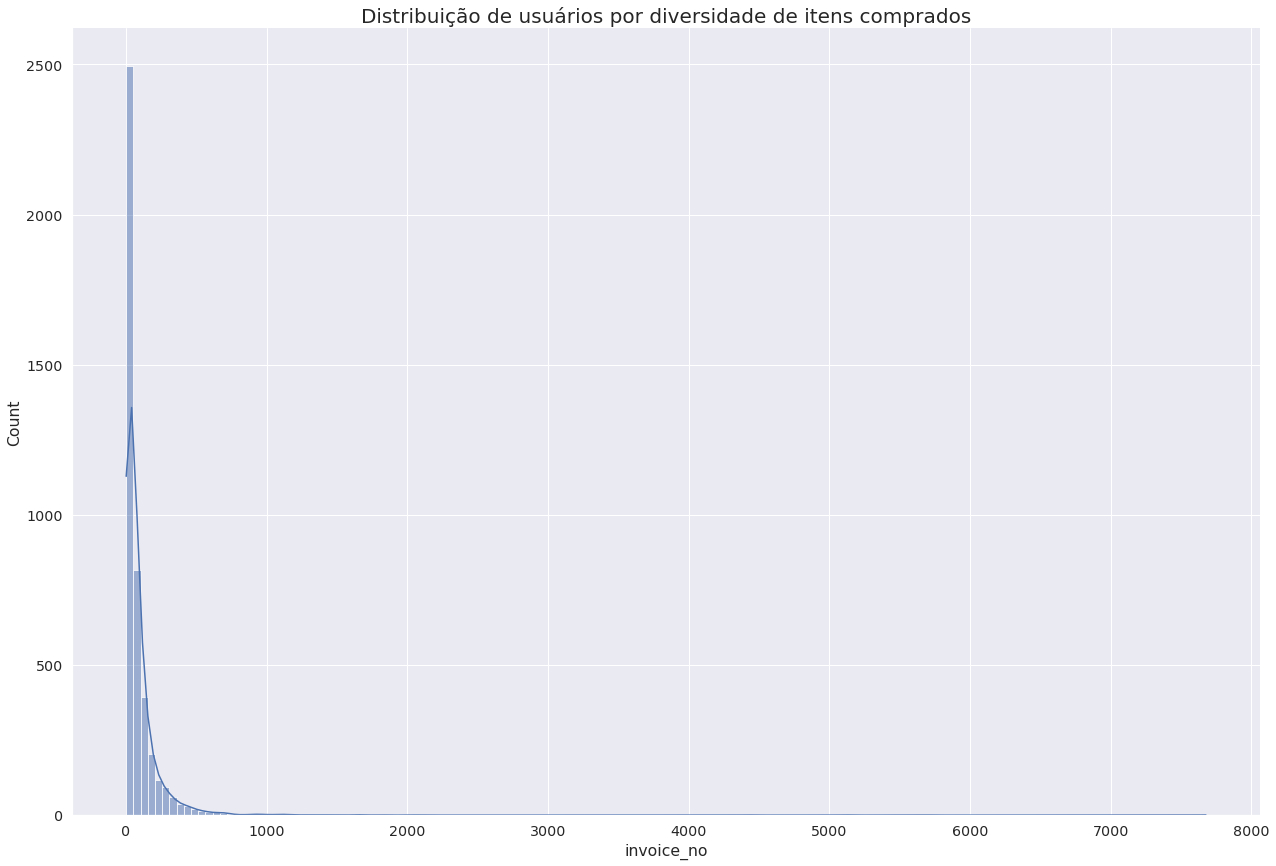

In [33]:
#Gráfico 1 - Distribuição de usuários por diversidade de itens comprados
ax = plt.figure(figsize=(16,10))
sns.set(context='talk', style='white')
sns.set(font_scale=1.3)
sns.displot(data=dataset_cust, x="invoice_no", kde=True, bins=150, height=12,aspect=1.5,)
plt.title('Distribuição de usuários por diversidade de itens comprados', fontsize=20)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


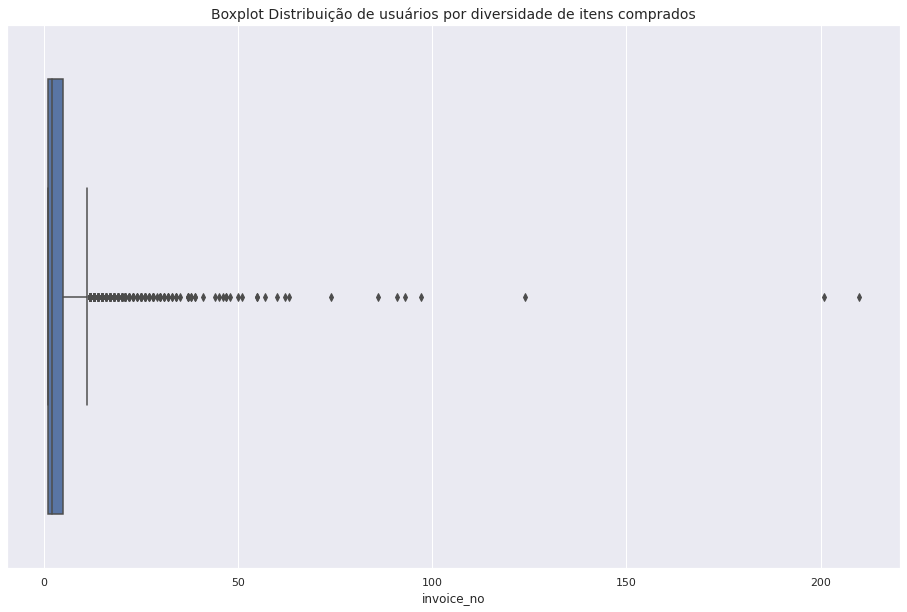

In [34]:
#Gráfico 2 - Boxplot da Distribuição de usuários por diversidade de itens comprados
ax = plt.figure(figsize=(16,10))
sns.set(context='talk', style='white')
sns.set(font_scale=1)
sns.boxplot(dataset_cust_n['invoice_no'])
plt.title('Boxplot Distribuição de usuários por diversidade de itens comprados', fontsize=14)
plt.show()

Conforme **Tabelas 26** e **Gráficos 1 e 2** tem-se a distribuição dos usuários *('customer_id')*, porém agora analisando os números únicos de *'invoice_id'*, ou seja, levando-se em consideração que a cada compra é gerado um novo número de *'invoice_id'* para o cliente. Sendo assim, é possível verificar quantas vezes o mesmo cliente efetuou as compras no período em questão, conforme **Tabelas 27**:
   - 1x é a menor quantidade de vezes que efetuou uma compra;
   - 248x é a maior quantidade de vezes que efetuou uma compra;
   - 25% dos usuários efetuaram até 1 compra;
   - 50% dos usuários efetuaram até 3 compras;
   - 75% dos usuários efetuaram compra até 5 compras;
   - a média é de 5 compras por usuário;

### Análise temporal ('date','month', 'hour')

Será analisado agora a relação temporal entre as colunas *'customer_id'* (usuário) e *'invoice_no'* (nota fiscal), ou seja, quantos produtos cada consumidor adquiriu ao longos do período, por dia, no acumulado do mês e por hora.

In [35]:
#Tabela 28 - Agrupando por data e usuário e calculando o número de 'invoice_no'
dataset_inv_date = dataset.groupby(['customer_id','date'])['invoice_no'].count().reset_index()
dataset_inv_date.groupby('customer_id')['invoice_no'].sum().reset_index()
dataset_inv_date.sort_values(by='customer_id',ascending=False)

,customer_id,date,invoice_no
16765,18287,2019-10-26,3
16764,18287,2019-10-10,38
16763,18287,2019-05-20,29
16756,18283,2019-07-12,55
16749,18283,2019-01-04,57
...,...,...,...
1,12347,2018-12-05,31
5,12347,2019-07-31,22
6,12347,2019-10-29,47
7,12347,2019-12-05,11


In [36]:
#Tabela 29 - Descrição estatística dos dados
dataset_inv_date.describe()

,customer_id,invoice_no
count,16766.000000,16766.000000
mean,15268.936836,23.424251
std,1730.771493,26.105372
min,12346.000000,1.000000
25%,13784.000000,8.000000
50%,15189.000000,17.000000
75%,16779.000000,29.000000
max,18287.000000,542.000000


<Figure size 1152x720 with 0 Axes>

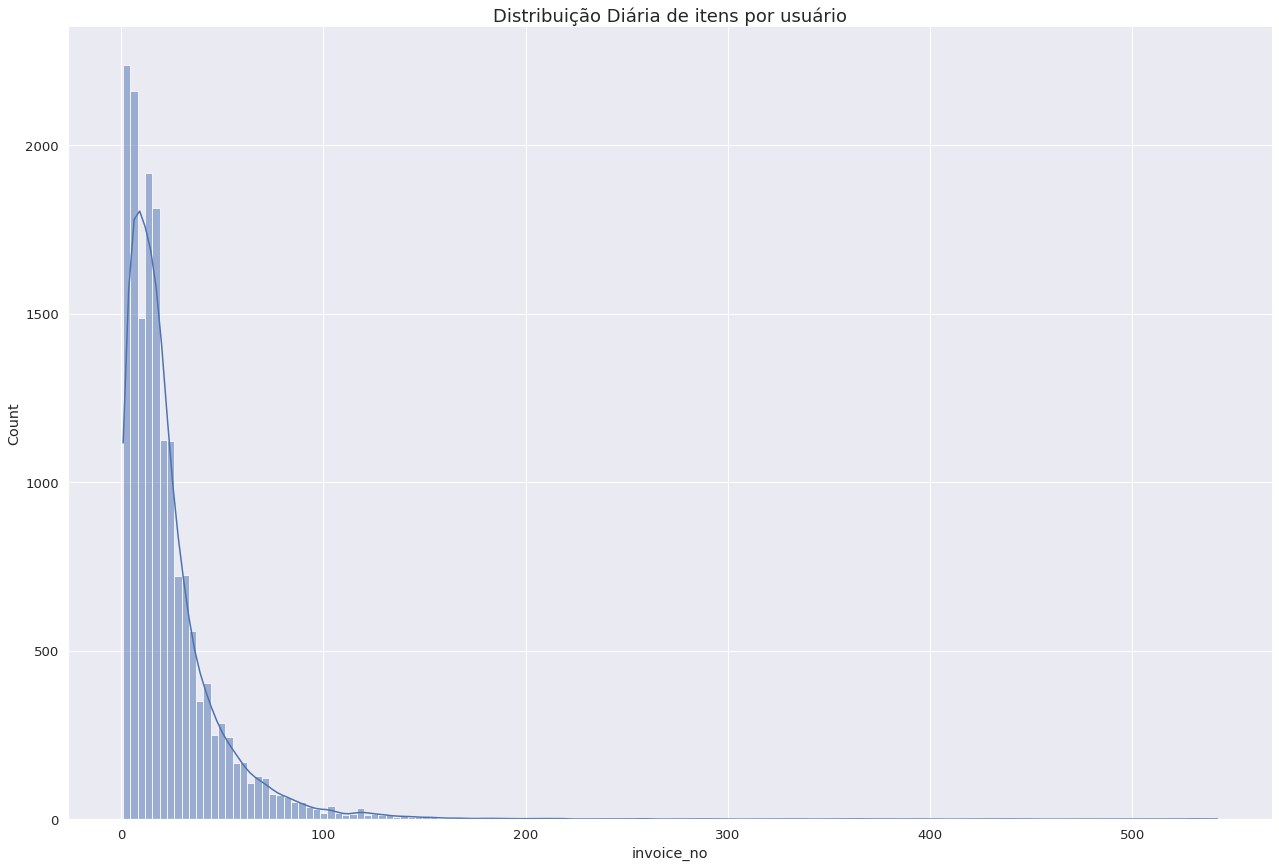

In [37]:
#Gráfico 3 - Distribuição de usuários por quantidade de itens comprados
ax = plt.figure(figsize=(16,10))
sns.set(context='talk', style='white')
sns.set(font_scale=1.2)
sns.displot(data=dataset_inv_date, x="invoice_no", kde=True, bins=150, height=12,aspect=1.5,)
plt.title('Distribuição Diária de itens por usuário', fontsize=18)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


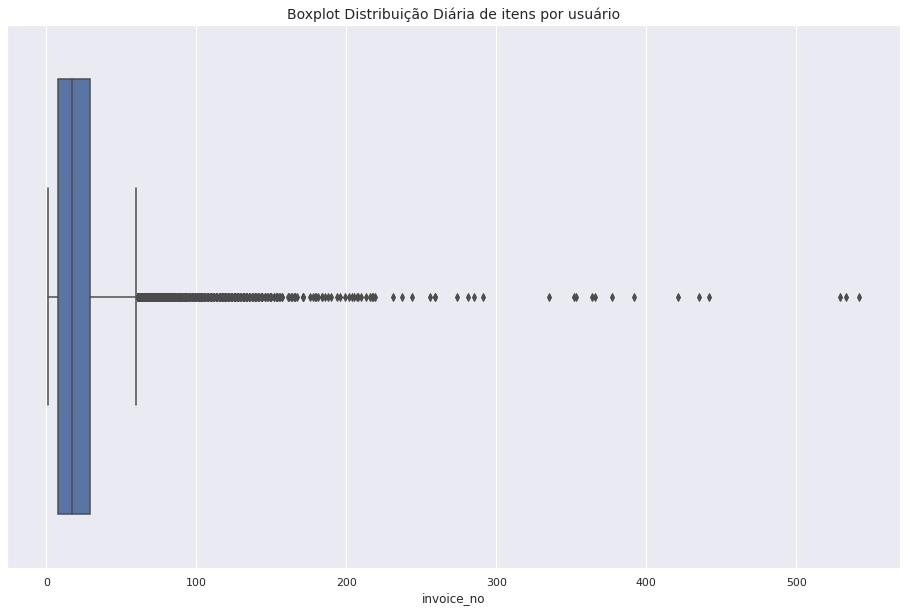

In [38]:
#Gráfico 4 - Boxplot Distribuição de usuários por quantidade de itens comprados
ax = plt.figure(figsize=(16,10))
sns.set(context='talk', style='white')
sns.set(font_scale=1)
sns.boxplot(dataset_inv_date['invoice_no'])
plt.title('Boxplot Distribuição Diária de itens por usuário', fontsize=14)
plt.show()

Conforme **Tabela 28** e **Gráficos 3 e 4** das colunas agrupadas *'date'*, *'invoice_no'* e *'customer_id'* afim de se verificar a distribuição de itens comprados por usuário *'customer_id'* ao longo do período analisado. Nota-se pelo gráfico e , conforme **Tabela 29** que:
   - a menor compra diária é de 1 item;
   - a maior compra diária é de 543 itens;
   - 25% dos usuários compraram até 5 itens por dia;
   - 50% dos usuários compraram até 14 itens por dia;
   - 75% dos usuários compraram até 27 itens por dia;
   - a média é de 20 itens por usuário por dia

In [39]:
#Tabela 30 - Distribuição de usuários por quantidade de itens comprados por 'invoice_no' única
dataset_inv_date_uni = dataset.groupby(['customer_id','date'])['invoice_no'].nunique().reset_index()
dataset_inv_date_uni.groupby('customer_id')['invoice_no'].sum().reset_index()
dataset_inv_date_uni.sort_values(by='invoice_no',ascending=False)

,customer_id,date,invoice_no
15615,17850,2018-11-30,24
1330,12748,2019-11-21,12
1261,12748,2019-05-04,11
15614,17850,2018-11-29,10
14376,17450,2019-09-18,8
...,...,...,...
5833,14356,2019-09-17,1
5834,14356,2019-09-19,1
5835,14357,2019-10-25,1
5836,14359,2019-09-11,1


In [40]:
#Tabela 31 - Descrição estatística dos dados
dataset_inv_date_uni.describe()

,customer_id,invoice_no
count,16766.000000,16766.000000
mean,15268.936836,1.105571
std,1730.771493,0.444950
min,12346.000000,1.000000
25%,13784.000000,1.000000
50%,15189.000000,1.000000
75%,16779.000000,1.000000
max,18287.000000,24.000000


<Figure size 1152x720 with 0 Axes>

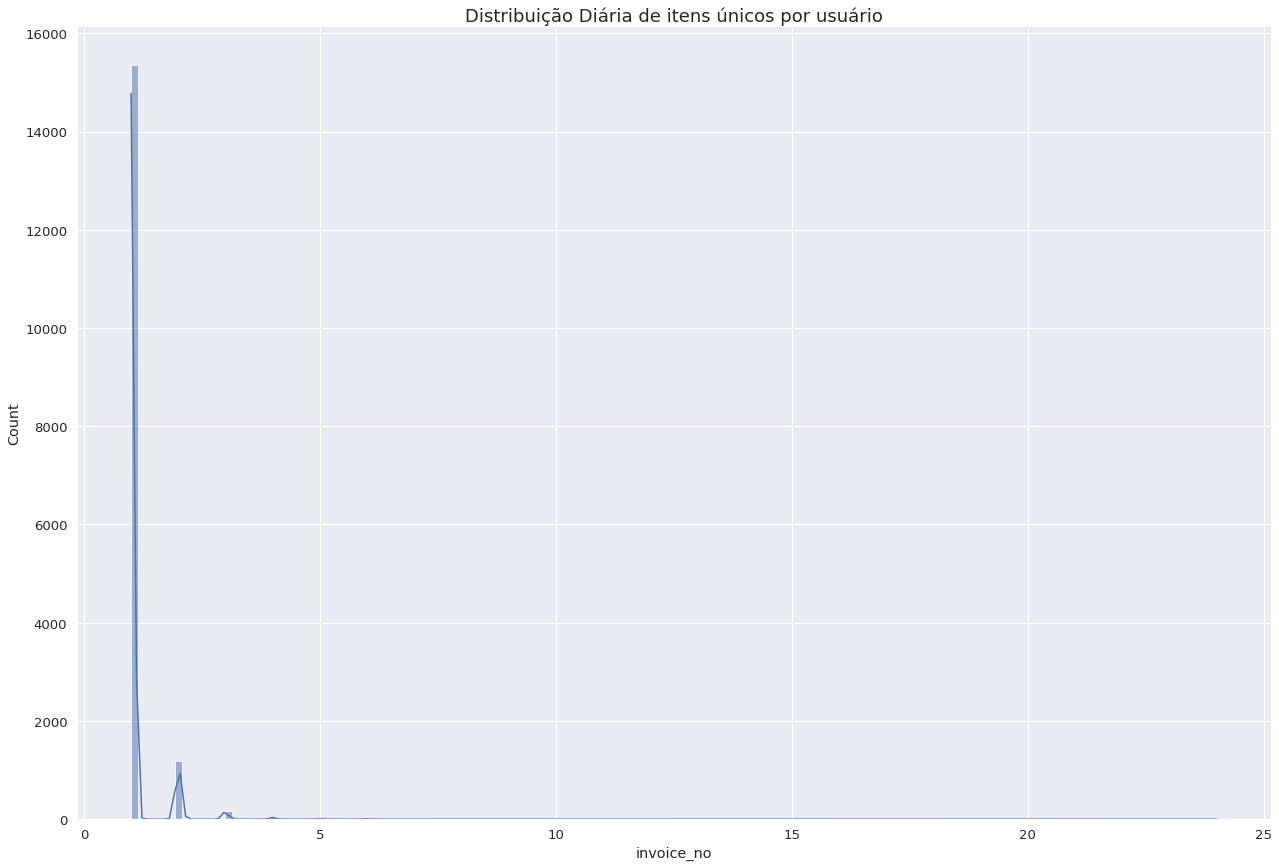

In [41]:
#Gráfico 5 - Distribuição diária de compras únicas por usuário
ax = plt.figure(figsize=(16,10))
sns.set(context='talk', style='white')
sns.set(font_scale=1.2)
sns.displot(data=dataset_inv_date_uni, x="invoice_no", kde=True, bins=150, height=12,aspect=1.5,)
plt.title('Distribuição Diária de itens únicos por usuário', fontsize=18)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


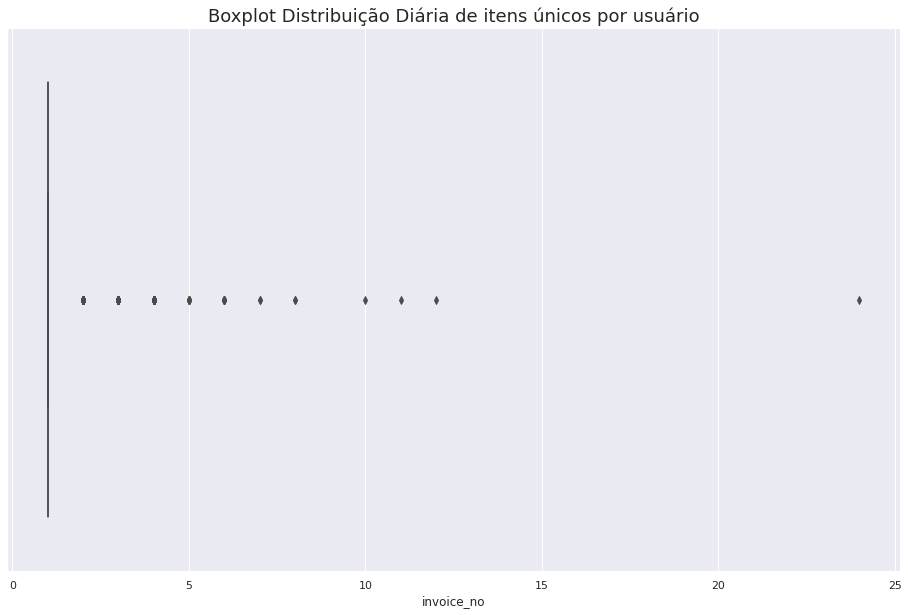

In [42]:
#Gráfico 6 - Boxplot Distribuição diária de compras únicas por usuário
ax = plt.figure(figsize=(16,10))
sns.set(context='talk', style='white')
sns.set(font_scale=1)
sns.boxplot(dataset_inv_date_uni['invoice_no'])
plt.title('Boxplot Distribuição Diária de itens únicos por usuário', fontsize=18)
plt.show()

De acordo com a **Tabela 30** e **Gráficos 5 e 6** onde demosntra a soma única de compra diária por usuário. Aqui o intuito é verificar quantas vezes cada usuário efetuou uma compra por dia. Levando-se em consideração que cada compra efetuada é gerada uma *'invoice_no'* (nota fiscal) diferente, aplicando o método *.nunique()* nesta coluna, obtem-se a quantidade de compras (acessos) de cada usuário separados por dia. Nota-se pela descrição estatística dos dados da **Tabela 31** e pelo gráfico que cerca de 75% dos usuários acessaram pelo menos uma vez por dia e  número máximo é de 24 acessos por dia.

In [43]:
#Tabela 32 - Agrupando por mês e calculando o número único de 'invoice_no'
dataset_inv_month_uni = dataset.groupby(['month'])['invoice_no'].nunique().reset_index()
dataset_inv_month_uni['ratio'] = (dataset_inv_month_uni['invoice_no'] / dataset_inv_month_uni['invoice_no'].sum())*100
dataset_inv_month_uni

,month,invoice_no,ratio
0,1,1101,5.939793
1,2,982,5.297799
2,3,1291,6.964825
3,4,1099,5.929003
4,5,1616,8.718170
5,6,1356,7.315494
6,7,1369,7.385628
7,8,1341,7.234571
8,9,1650,8.901597
9,10,2054,11.081139


In [44]:
#Tabela 33 - Descrição estatística dos dados
dataset_inv_month_uni.describe()

,month,invoice_no,ratio
count,12.000000,12.000000,12.000000
mean,6.500000,1544.666667,8.333333
std,3.605551,544.942088,2.939912
min,1.000000,982.000000,5.297799
25%,3.750000,1243.500000,6.708567
50%,6.500000,1362.500000,7.350561
75%,9.250000,1659.500000,8.952849
max,12.000000,2989.000000,16.125378


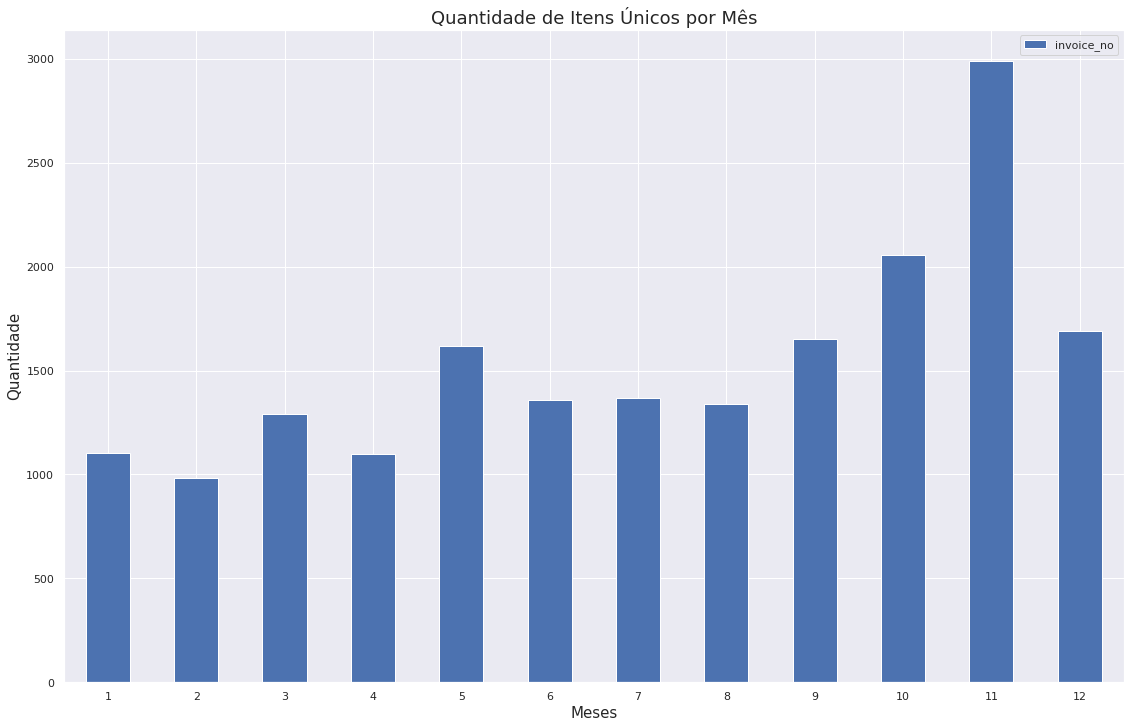

In [45]:
#Gráfico 7 - Quantidade de Compras Únicas por Mês
dataset_inv_month_uni.plot.bar(x='month',y='invoice_no',rot=0,figsize=(19,12))
plt.title('Quantidade de Itens Únicos por Mês', fontsize=18)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Tomando como referência de que cada registro de *'invoice_no'* corresponde a um item comprado por um usuário, tem-se acima a tabela e gráfico plotados. Nota-se que há uma crescente com alternância entre os meses, ou seja, os meses  1, 3 e 5 apresentam crescimento em relação aos meses anteriores (2 e 4). Nota-se que os meses 6, 7 e 8 apresentam valores bem próximos e, apartir desses, os meses a seguir apresentam um crescimento elevado de itens comprados, atingindo o pico máximo em 11; vindo a apresentar uma queda em 12. Outro fato interessante é que os meses 9, 10 e 11 juntos respondem por 35% do total de itens comprados no período em relação aos demais meses.

In [46]:
#Tabela 34 - Agrupando por dia e calculando o número único de 'invoice_no'
dataset_inv_day_uni = dataset.groupby(['day'])['invoice_no'].nunique().reset_index()
dataset_inv_day_uni['ratio'] = (dataset_inv_day_uni['invoice_no'] / dataset_inv_day_uni['invoice_no'].sum())*100
dataset_inv_day_uni

,day,invoice_no,ratio
0,1,520,2.805352
1,2,629,3.393397
2,3,723,3.900518
3,4,801,4.321321
4,5,773,4.170263
5,6,771,4.159473
6,7,660,3.560639
7,8,627,3.382607
8,9,629,3.393397
9,10,507,2.735218


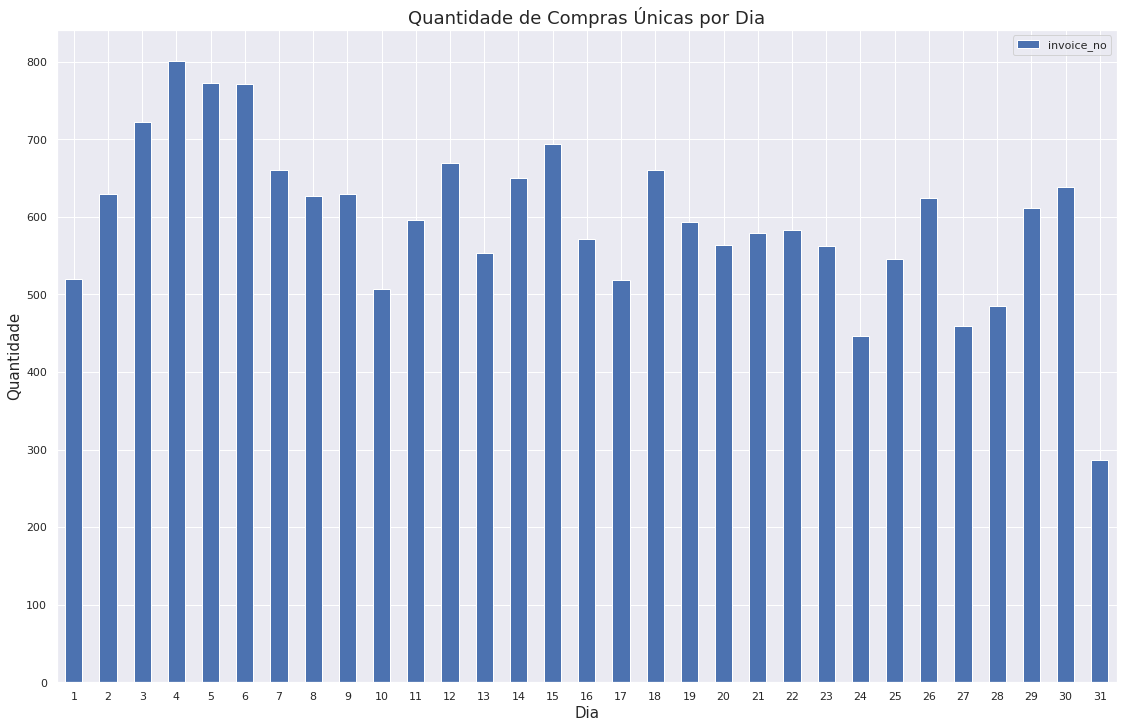

In [47]:
#Gráfico 8 - Quantidade de Compras Únicas por Dia
dataset_inv_day_uni.plot.bar(x='day',y='invoice_no', rot=0,figsize=(19,12))
plt.title('Quantidade de Compras Únicas por Dia', fontsize=18)
plt.xlabel('Dia', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Continuando com a mesma abordagem acima, tem-se aqui as compras únicas agrupados por dia. Nota-se um comportamento crescente nos 4 primeiros dias, onde no dia 4 atinge o pico máximo. Após isso, veerifica-se um comportamento decrescente que se estende até o dia 31, indicando uma preferência maior do usuário em comprar nas duas primeiras semanas do mês, principamente nos dias 4 e 12) 

- 1º semana: 25,9%
- 2º semana: 23,6%
- 3º semana: 22,7%
- 4º semana: 19,6%

In [48]:
#Tabela 35 - Agrupando por hora e calculando o número único de 'invoice_no'
dataset_inv_hour_uni = dataset.groupby(['hour'])['invoice_no'].nunique().reset_index()
dataset_inv_hour_uni['ratio'] = (dataset_inv_hour_uni['invoice_no'] / dataset_inv_hour_uni['invoice_no'].sum())*100
dataset_inv_hour_uni.sort_values(by='invoice_no',ascending=False)

,hour,invoice_no,ratio
6,12,3130,16.885149
7,13,2637,14.225603
5,11,2277,12.283541
8,14,2275,12.272752
4,10,2226,12.008416
9,15,2038,10.994228
3,9,1394,7.520095
10,16,1100,5.934078
2,8,555,2.994012
11,17,544,2.934671


In [49]:
#Tabela 36 - Somando os percntuais das 10h às 14h
dataset_inv_hour_uni.ratio.iloc[4:9].sum()

67.67545989102875

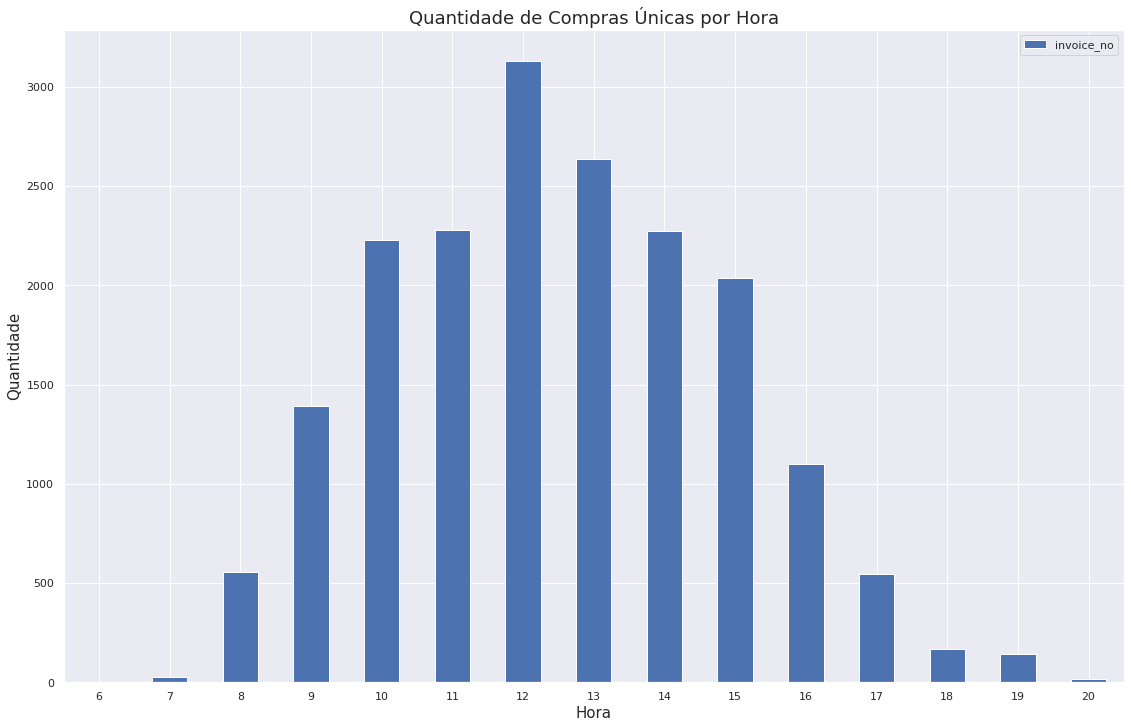

In [50]:
#Gráfico 9 - Quantidade de Compras Únicas por Hora
dataset_inv_hour_uni.plot.bar(x='hour',y='invoice_no', rot=0,figsize=(19,12))
plt.title('Quantidade de Compras Únicas por Hora', fontsize=18)
plt.xlabel('Hora', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Acima tem-se as compras únicas, porém agora agrupadas por hora, onde é possível verificar que os acessos ao site e as compras efetuadas não são homogêneos ao longo das horas, ou seja, cerca de 67% de todas as compras são efetuadas entre 10h e 14h (com o pico máximo sendo às 12h), conforme **Tabela 36**, indicando o horário preferencial dos usuários no acesso ao site e, consequentemente, na efetivação das compras.

### Colunas 'customer_id' e 'total_price' 

Será analisado agora a relação entre os usuários *('customer_id')* e o preço total dos itens adquiridos *('total_price')*, ou seja, o quanto cada usuário gastou por data e dia, mês e hora acumulados.

In [51]:
#Tabela 37 - Agrupando por data e somando os valores totais
dataset_tot = dataset.pivot_table(index=['date'], values='total_price',aggfunc=['sum']).reset_index()
dataset_tot

,date,sum
,,total_price
0,2018-11-29,46192.49
1,2018-11-30,47197.57
2,2018-12-01,23876.63
3,2018-12-03,31369.23
4,2018-12-04,31009.33
...,...,...
300,2019-12-03,58081.09
301,2019-12-04,45989.66
302,2019-12-05,69230.60


In [52]:
#Tabela 38 - Descrição estatística dos dados
dataset_tot.describe()

,sum
,total_price
count,305.000000
mean,29156.805557
std,17840.574960
min,3439.670000
25%,17999.181000
50%,25423.760000
75%,36625.200000
max,184329.660000


In [53]:
#Tabela 39 - Agrupando por mês e somando os valores totais
dataset_tot_m = dataset.pivot_table(index=['month'], values='total_price',aggfunc=['sum']).reset_index()
dataset_tot_m

,month,sum
,,total_price
0,1,611670.060
1,2,444933.200
2,3,576396.380
3,4,450858.941
4,5,714174.940
5,6,628733.190
6,7,626942.231
7,8,672843.080
8,9,894626.653


In [54]:
#Tabela 40 - Descrição estatística dos dados
dataset_tot_m.describe()

,month,sum
,,total_price
count,12.000000,1.200000e+01
mean,6.500000,7.410688e+05
std,3.605551,2.531353e+05
min,1.000000,4.449332e+05
25%,3.750000,6.028516e+05
50%,6.500000,6.507881e+05
75%,9.250000,8.973327e+05
max,12.000000,1.274394e+06


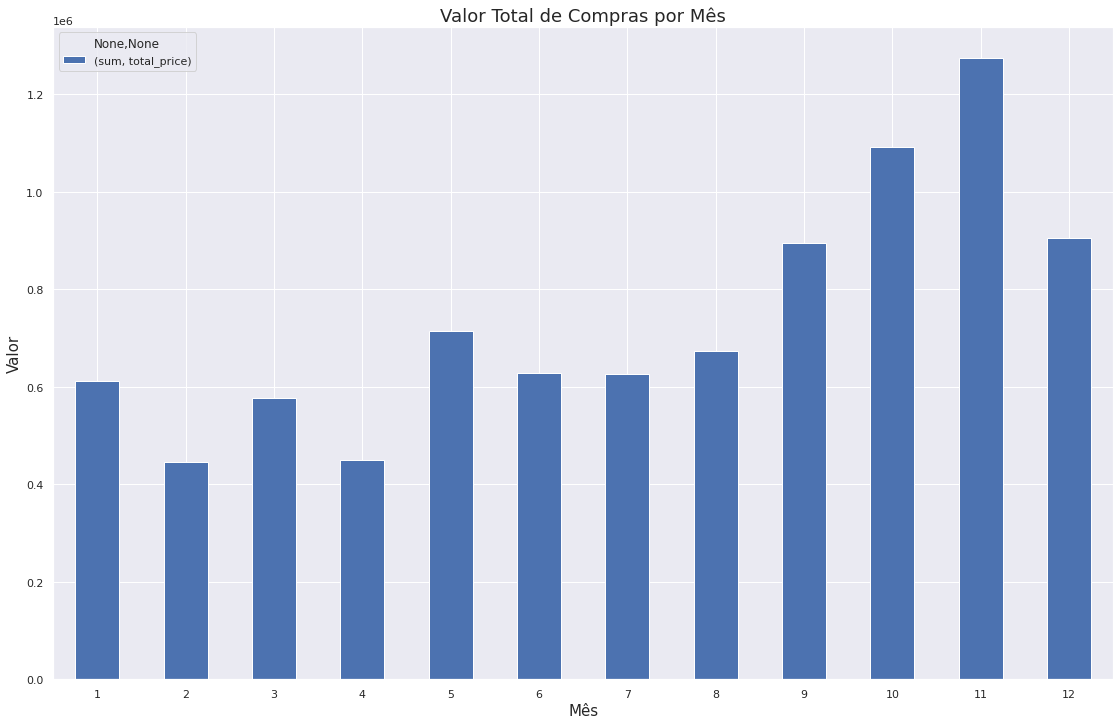

In [55]:
#Gráfico 10 - Valor Total de Compras por mês
dataset_tot_m.plot.bar(x='month', rot=0,figsize=(19,12))
plt.title('Valor Total de Compras por Mês', fontsize=18)
plt.xlabel('Mês', fontsize=15)
plt.ylabel('Valor', fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [56]:
#Tabela 41 - Agrupando por dia e somando os valores totais
dataset_tot_d = dataset.pivot_table(index=['day'], values='total_price',aggfunc=['sum']).reset_index()
dataset_tot_d

,day,sum
,,total_price
0,1,285525.880
1,2,328459.290
2,3,352640.660
3,4,335770.290
4,5,376063.100
5,6,295838.500
6,7,459306.140
7,8,324583.440
8,9,345119.870


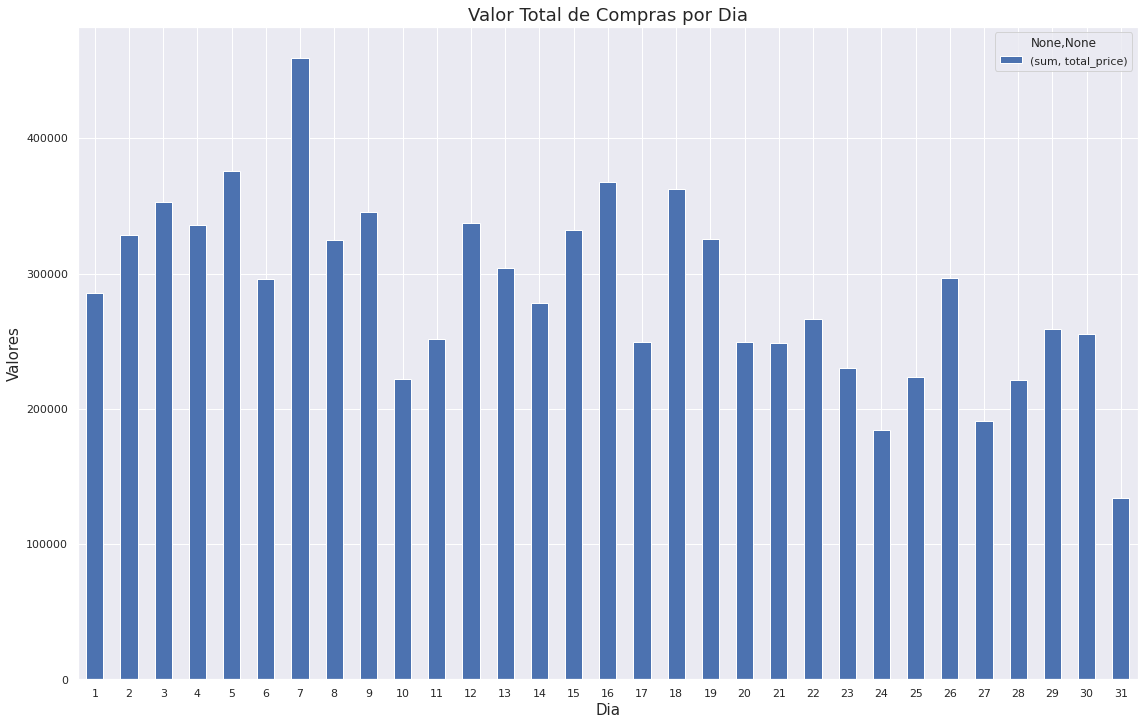

In [57]:
#Gráfico 11 - Valor Total de Compras por Dia
dataset_tot_d.plot.bar(x='day', rot=0,figsize=(19,12))
plt.title('Valor Total de Compras por Dia', fontsize=18)
plt.xlabel('Dia', fontsize=15)
plt.ylabel('Valores', fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [58]:
#Tabela 42 - Agrupando por hora e somando os valores totais
dataset_tot_h = dataset.pivot_table(index=['hour'], values='total_price',aggfunc=['sum']).reset_index()
dataset_tot_h

,hour,sum
,,total_price
0,6,4.250
1,7,31059.210
2,8,282004.570
3,9,842411.291
4,10,1259392.741
5,11,1102467.540
6,12,1373732.541
7,13,1168898.050
8,14,993119.201


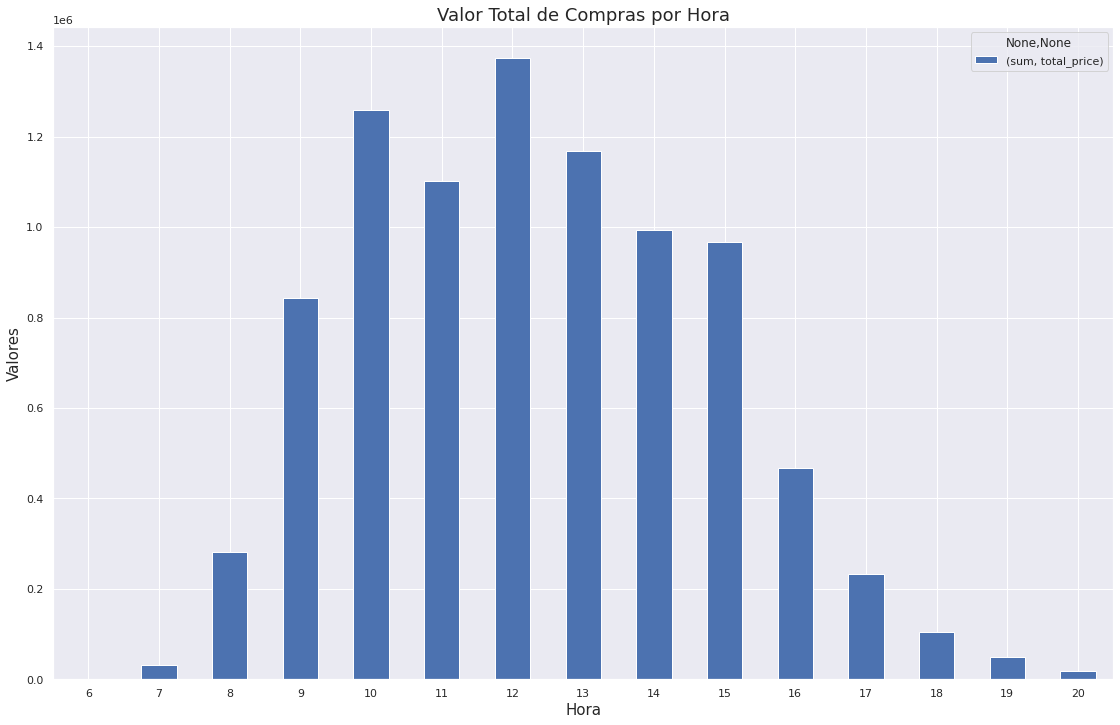

In [59]:
#Gráfico 12 - Valor Total de Compras por Hora
dataset_tot_h.plot.bar(x='hour', rot=0,figsize=(19,12))
plt.title('Valor Total de Compras por Hora', fontsize=18)
plt.xlabel('Hora', fontsize=15)
plt.ylabel('Valores', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Dentre as tabelas e gráficos plotados acima, algumas observações importantes podem ser apontadas:

- em média, cada usuário comprou 92 itens diversos no período;
- em média, cada usuário acessou o site 5 vezes para efetuar alguma compra no período;
- em média, cada usuário comprou cerca de 20 itens diversos por dia
- cerca de 75% dos usuários acessam o site pelo menos 1 vez ao dia;
- 35% do total de itens do período são comprados nos meses 9, 10 e 11;
- os dias 4, 5 e 6 são os dias que apresentam as maiores quantidades de compras no período, sendo a primeira semana responsável por quase 26% do total;
- cerca de 66% das compras resgistradas no período são efetuadas entre 10h e 14h;
- nem sempre dias com os maiores números de acessos são os responsáveis pelo maior faturamento,  ou seja, o faturamento nao está somente relacionado com o número de usuários que acessam o site, mas também com o valor dos itens comprados no mesmo dia/mês; 

## Segmentação de Clientes

A segmentação de clientes envolve o agrupamento de clientes existentes e potenciais com base em características comuns entre si. Ao segmentar os clientes em diferentes classes, é possivel entender melhor suas necessidades, preferências e padrões de compra. 

É uma ferramenta muito importante para tomada de decisão ou ação necessária para aumentar a receita, construir um bom relacionamento com o cliente e otimizar as vendas e campanhas de marketing. Seus benefícios são:

- Maior relacionamento com o cliente e fidelidade à marca: Segmentação de clientes seria nos dar uma referência para tomar ações para cada cliente em sua segmentação, como uma diferenciação de produto, fazer uma campanha de foco para cada cliente e outra estratégia que temos;
- Otimizar recursos: A segmentação de clientes fez com que as empresas se concentrassem com escala prioritária. Essa segmentação nos dá para alcançar o cliente "estrela" com grande compra até o cliente "raro" com baixa compra. As empresas podem focar sua energia, custos e atenção naquele segmento específico.

### A Análise de Cohort

A análise de cohort é diferente das demais técnicas de segmentação de clientes, pois analisa-os de maneira temporal, ou seja, analisa o comportamento dos clientes dentro de um período de tempo e em espaços temporais definidos (semestres, quadrimestres, trimestres, meses, semanas,...) com o intuito de verificar a mudança de comportamento do clientes com o passar do tempo. Para os propósitos do estudo, serão analisados as seguintes métricas:

- **Usuários Ativos:** qual o percentual de clientes que voltam a fazer compras no site;
- **Quantidade de Pedidos:** verificar a variação da quatidade de pedidos;
- **Frequência de Compras:** quantas vezes (em média) por mês os clientes compram;
- **Valor Médio da Receita:** verificar a variação da receita média no período

In [60]:
#Tabela 43 - Conjunto de Dados
dataset.head()

,invoice_no,stock_code,description,quantity,unit_price,total_price,invoice_date,customer_id,date,month,day,time,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2018-11-29 08:26:00,17850,2018-11-29,11,29,08:26:00,8


In [61]:
#Tabela 44 - Verificando as datas mínimas e máximas 
print(dataset['invoice_date'].min())
print(dataset['invoice_date'].max())

2018-11-29 08:26:00
2019-12-07 12:50:00


Como a análise será feita no período de 1 ano, serão excluídos todas as linhas anteriores a **2018-12-01**

In [62]:
#Tabela 45 - Excluindo valores anteriores a 2018-12-01
dataset = dataset[dataset['invoice_date'] > '2018-12-01']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388874 entries, 3857 to 392730
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    388874 non-null  object        
 1   stock_code    388874 non-null  object        
 2   description   388874 non-null  object        
 3   quantity      388874 non-null  int64         
 4   unit_price    388874 non-null  float64       
 5   total_price   388874 non-null  float64       
 6   invoice_date  388874 non-null  datetime64[ns]
 7   customer_id   388874 non-null  int64         
 8   date          388874 non-null  object        
 9   month         388874 non-null  int64         
 10  day           388874 non-null  int64         
 11  time          388874 non-null  object        
 12  hour          388874 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 41.5+ MB


#### Usuários Ativos Mensais - Retenção de Usuários

In [63]:
#Tabela 46 - Agrupando 'invoice_no','customer_id','date','month','day','time','hour' e somando 'total_price'
dataset_cohort = dataset.groupby(['invoice_no','customer_id','quantity','date','month','day','time','hour'])['total_price'].sum().reset_index()
dataset_cohort

,invoice_no,customer_id,quantity,date,month,day,time,hour,total_price
0,536847,17135,6,2018-12-01,12,1,09:31:00,9,15.30
1,536847,17135,12,2018-12-01,12,1,09:31:00,9,15.00
2,536847,17135,24,2018-12-01,12,1,09:31:00,9,150.00
3,536847,17135,36,2018-12-01,12,1,09:31:00,9,15.12
4,536847,17135,48,2018-12-01,12,1,09:31:00,9,20.16
...,...,...,...,...,...,...,...,...,...
108219,581587,12680,3,2019-12-07,12,7,12:50:00,12,14.85
108220,581587,12680,4,2019-12-07,12,7,12:50:00,12,109.80
108221,581587,12680,6,2019-12-07,12,7,12:50:00,12,12.60
108222,581587,12680,8,2019-12-07,12,7,12:50:00,12,15.60


In [64]:
#Tabela 47 - Agrupando 'customer_id' pela 'data' mínima
dataset_cohort_first_order = dataset_cohort.groupby('customer_id')['date'].min()
dataset_cohort_first_order

customer_id
12346    2019-01-16
12347    2018-12-05
12348    2018-12-14
12349    2019-11-19
12350    2019-01-31
            ...    
18280    2019-03-05
18281    2019-06-10
18282    2019-08-03
18283    2019-01-04
18287    2019-05-20
Name: date, Length: 4304, dtype: object

In [65]:
#Tabela 48 - Juntando as duas tabelas por 'customer_id'
dataset_cohort_first_order.name = 'first_order_date'
dataset_cohort = dataset_cohort.join(dataset_cohort_first_order, on='customer_id')

In [66]:
#Tabela 49 - Conjunto de Dados
dataset_cohort.head()

,invoice_no,customer_id,quantity,date,month,day,time,hour,total_price,first_order_date
0,536847,17135,6,2018-12-01,12,1,09:31:00,9,15.30,2018-12-01
1,536847,17135,12,2018-12-01,12,1,09:31:00,9,15.00,2018-12-01
2,536847,17135,24,2018-12-01,12,1,09:31:00,9,150.00,2018-12-01
3,536847,17135,36,2018-12-01,12,1,09:31:00,9,15.12,2018-12-01
4,536847,17135,48,2018-12-01,12,1,09:31:00,9,20.16,2018-12-01


In [67]:
#Alterando o tipo de dado da coluna 'first_order_date'
dataset_cohort['first_order_month'] = dataset_cohort['first_order_date'].astype('datetime64[M]')

In [68]:
#Alterando o tipo de dado da coluna 'order_month'
dataset_cohort['order_month'] = dataset_cohort['date'].astype('datetime64[M]')

In [69]:
#Tabela 50 - Conjunto de Dados
dataset_cohort.head()

,invoice_no,customer_id,quantity,date,month,day,time,hour,total_price,first_order_date,first_order_month,order_month
0,536847,17135,6,2018-12-01,12,1,09:31:00,9,15.30,2018-12-01,2018-12-01,2018-12-01
1,536847,17135,12,2018-12-01,12,1,09:31:00,9,15.00,2018-12-01,2018-12-01,2018-12-01
2,536847,17135,24,2018-12-01,12,1,09:31:00,9,150.00,2018-12-01,2018-12-01,2018-12-01
3,536847,17135,36,2018-12-01,12,1,09:31:00,9,15.12,2018-12-01,2018-12-01,2018-12-01
4,536847,17135,48,2018-12-01,12,1,09:31:00,9,20.16,2018-12-01,2018-12-01,2018-12-01


In [70]:
#Tabela 51 - Calculando e ajustando os valores da coluna 'cohort_lifetime'
dataset_cohort['cohort_lifetime'] = (dataset_cohort['order_month'] - dataset_cohort['first_order_month'])
dataset_cohort['cohort_lifetime'] = dataset_cohort['cohort_lifetime'] / np.timedelta64(1, 'M')
dataset_cohort['cohort_lifetime'] = (dataset_cohort['cohort_lifetime'].round().astype('int'))
dataset_cohort.head()

,invoice_no,customer_id,quantity,date,month,day,time,hour,total_price,first_order_date,first_order_month,order_month,cohort_lifetime
0,536847,17135,6,2018-12-01,12,1,09:31:00,9,15.30,2018-12-01,2018-12-01,2018-12-01,0
1,536847,17135,12,2018-12-01,12,1,09:31:00,9,15.00,2018-12-01,2018-12-01,2018-12-01,0
2,536847,17135,24,2018-12-01,12,1,09:31:00,9,150.00,2018-12-01,2018-12-01,2018-12-01,0
3,536847,17135,36,2018-12-01,12,1,09:31:00,9,15.12,2018-12-01,2018-12-01,2018-12-01,0
4,536847,17135,48,2018-12-01,12,1,09:31:00,9,20.16,2018-12-01,2018-12-01,2018-12-01,0


In [71]:
#Tabela 52 - Agrupando as datas pelos valores de 'customer_id'
dataset_cohort_map = dataset_cohort.pivot_table(index='first_order_month',columns='cohort_lifetime',values='customer_id',aggfunc='nunique')
dataset_cohort_map.replace({np.nan:' '})

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2018-12-01,768.0,316.0,260.0,311.0,277.0,326.0,289.0,282.0,288.0,307.0,325.0,419.0,176.0
2019-01-01,492.0,103.0,137.0,116.0,165.0,143.0,130.0,129.0,149.0,155.0,180.0,42.0,
2019-02-01,383.0,70.0,69.0,111.0,103.0,92.0,93.0,107.0,99.0,120.0,19.0,,
2019-03-01,432.0,64.0,114.0,85.0,104.0,79.0,111.0,110.0,114.0,32.0,,,
2019-04-01,301.0,65.0,60.0,66.0,62.0,67.0,70.0,82.0,15.0,,,,
2019-05-01,300.0,60.0,49.0,50.0,61.0,71.0,86.0,16.0,,,,,
2019-06-01,233.0,43.0,38.0,59.0,58.0,74.0,15.0,,,,,,
2019-07-01,206.0,36.0,39.0,46.0,54.0,18.0,,,,,,,
2019-08-01,167.0,30.0,45.0,48.0,13.0,,,,,,,,


Pela **Tabela 51** é possivel verificar o comportamento dos usuários no site no período em questão. O **'cohort_0'**  indica todos os clientes que acessaram e efetuaram uma compra. No **'cohort_1'**, mostra quantos desses usuários efetuaram uma compra no mês seguinte novamente. O **'cohort_2'** mostra quantos compraram  meses após a primeira compra e assim por diante.

In [72]:
#Tabela 53 - Verificando os percentuais da quantidade de usuários - pct_media
dataset_cohort_map_pct = dataset_cohort_map.divide(dataset_cohort_map.iloc[:,0],axis=0)
dataset_cohort_map_pct['pct_media'] = dataset_cohort_map_pct.iloc[:,1:].mean(axis=1)
dataset_cohort_map_pct.replace({np.nan:' '})*100

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,pct_media
first_order_month,,,,,,,,,,,,,,
2018-12-01,100.0,41.145833,33.854167,40.494792,36.067708,42.447917,37.630208,36.71875,37.5,39.973958,42.317708,54.557292,22.916667,38.802083
2019-01-01,100.0,20.934959,27.845528,23.577236,33.536585,29.065041,26.422764,26.219512,30.284553,31.504065,36.585366,8.536585,...,26.773836
2019-02-01,100.0,18.276762,18.015666,28.981723,26.89295,24.020888,24.281984,27.937337,25.848564,31.331593,4.960836,...,...,23.05483
2019-03-01,100.0,14.814815,26.388889,19.675926,24.074074,18.287037,25.694444,25.462963,26.388889,7.407407,...,...,...,20.910494
2019-04-01,100.0,21.594684,19.933555,21.92691,20.598007,22.259136,23.255814,27.242525,4.983389,...,...,...,...,20.224252
2019-05-01,100.0,20.0,16.333333,16.666667,20.333333,23.666667,28.666667,5.333333,...,...,...,...,...,18.714286
2019-06-01,100.0,18.454936,16.309013,25.321888,24.892704,31.759657,6.437768,...,...,...,...,...,...,20.529328
2019-07-01,100.0,17.475728,18.932039,22.330097,26.213592,8.737864,...,...,...,...,...,...,...,18.737864
2019-08-01,100.0,17.964072,26.946108,28.742515,7.784431,...,...,...,...,...,...,...,...,20.359281


In [73]:
#Tabela 54 - Média Geral da quantidade de usuários no ano
dataset_cohort_map_pct.iloc[:,1:].mean(axis=1).mean()

0.21090607284376447

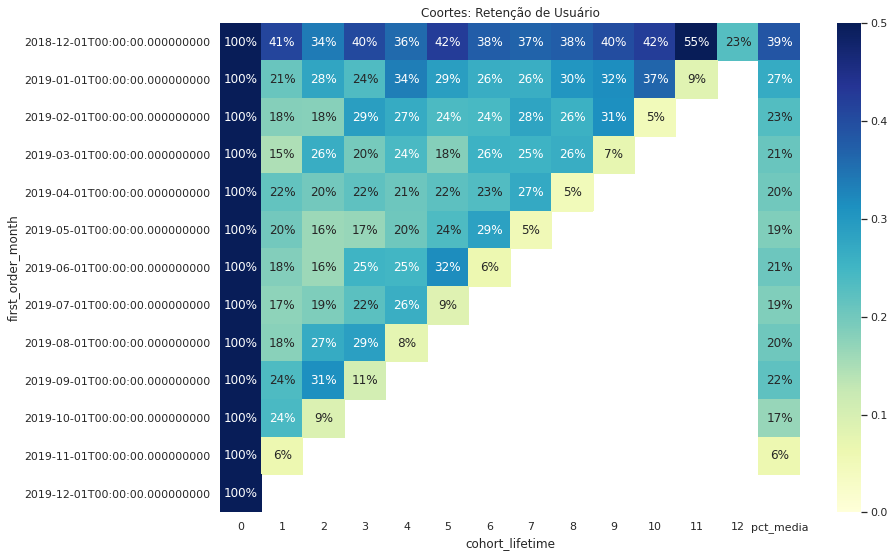

In [74]:
#Gráfico 13 - Plotando o gráfico 'Coortes: Retenção de Usuário'
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Coortes: Retenção de Usuário')
sns.heatmap(dataset_cohort_map_pct, annot = True, fmt = '.0%', vmin = 0.0,vmax = 0.5,cmap = "YlGnBu")
plt.show()

Analisando a **Tabela 52** nota-se a distribuição percentual dos acessos dos usuários no período. Na primeira linha, observa-se que 316 usuários (**Tabela 51**) voltaram a comprar após terem comprado pela primeira vez no mês anterior, o que corresponde a 41% de usuários que retornaram ao site. Quanto maior esse percentual, maior é a aceitação dos produtos do site da loja em questão e maior a taxa de retenção desses usuários. Cerca de 55% dos usuários retornam ao site após 1 ano, conforma cohort 11.

Na **Tabela 53** é apresentado a taxa mèdia geral dos acessos dos usuários em todo o período (2018-2019), onde apresenta um valor de aproximadamente 21%.

Ao analisar o **Gráfico 13** nota-se que os usuários mais antigos apresentam uma taxa de retenção maior, possivelmente impactada pela quantidade maior de dados observáveis desses usuários em relação aos demais. Analisando por data, observa-se que esses usuários também apresentam uma taxa média maior, cerca de 39%

#### Quantidade de Pedidos no Período

In [75]:
#Tabela 55 - Agrupando as datas pela da quantidade de pedidos feitos 
dataset_cohort_quant = dataset_cohort.pivot_table(index='first_order_month',columns='cohort_lifetime',values='invoice_no',aggfunc='nunique',).round()
dataset_cohort_quant['total'] = dataset_cohort_quant.sum(axis=1)
dataset_cohort_quant.replace({np.nan:' '})

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,total
first_order_month,,,,,,,,,,,,,,
2018-12-01,1142.0,535.0,429.0,540.0,450.0,637.0,526.0,519.0,539.0,550.0,645.0,937.0,223.0,7672.0
2019-01-01,566.0,131.0,182.0,145.0,228.0,193.0,183.0,172.0,190.0,220.0,294.0,53.0,,2557.0
2019-02-01,422.0,95.0,85.0,160.0,118.0,119.0,112.0,137.0,127.0,173.0,20.0,,,1568.0
2019-03-01,474.0,81.0,154.0,117.0,126.0,107.0,132.0,154.0,188.0,37.0,,,,1570.0
2019-04-01,338.0,89.0,69.0,75.0,71.0,74.0,81.0,106.0,15.0,,,,,918.0
2019-05-01,348.0,74.0,61.0,65.0,82.0,87.0,123.0,17.0,,,,,,857.0
2019-06-01,259.0,55.0,49.0,71.0,74.0,106.0,18.0,,,,,,,632.0
2019-07-01,231.0,42.0,49.0,53.0,77.0,19.0,,,,,,,,471.0
2019-08-01,184.0,38.0,62.0,61.0,13.0,,,,,,,,,358.0


In [76]:
#Tabela 56 - Verificando os percentuais da quantidade Média de itens vendidos
dataset_cohort_quant1 = dataset_cohort.pivot_table(index='first_order_month',columns='cohort_lifetime',values='invoice_no',aggfunc='nunique',).round()

dataset_cohort_quant_pct = dataset_cohort_quant1.divide(dataset_cohort_quant1.iloc[:,0],axis=0).round(2)
dataset_cohort_quant_pct['pct_media'] = dataset_cohort_quant_pct.iloc[:,1:].mean(axis=1).round(2)
dataset_cohort_quant_pct.replace({np.nan:' '}).round(2)*100

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,pct_media
first_order_month,,,,,,,,,,,,,,
2018-12-01,100.0,47.0,38.0,47.0,39.0,56.0,46.0,45.0,47.0,48.0,56.0,82.0,20.0,48.0
2019-01-01,100.0,23.0,32.0,26.0,40.0,34.0,32.0,30.0,34.0,39.0,52.0,9.0,...,32.0
2019-02-01,100.0,23.0,20.0,38.0,28.0,28.0,27.0,32.0,30.0,41.0,5.0,...,...,27.0
2019-03-01,100.0,17.0,32.0,25.0,27.0,23.0,28.0,32.0,40.0,8.0,...,...,...,26.0
2019-04-01,100.0,26.0,20.0,22.0,21.0,22.0,24.0,31.0,4.0,...,...,...,...,21.0
2019-05-01,100.0,21.0,18.0,19.0,24.0,25.0,35.0,5.0,...,...,...,...,...,21.0
2019-06-01,100.0,21.0,19.0,27.0,29.0,41.0,7.0,...,...,...,...,...,...,24.0
2019-07-01,100.0,18.0,21.0,23.0,33.0,8.0,...,...,...,...,...,...,...,21.0
2019-08-01,100.0,21.0,34.0,33.0,7.0,...,...,...,...,...,...,...,...,24.0


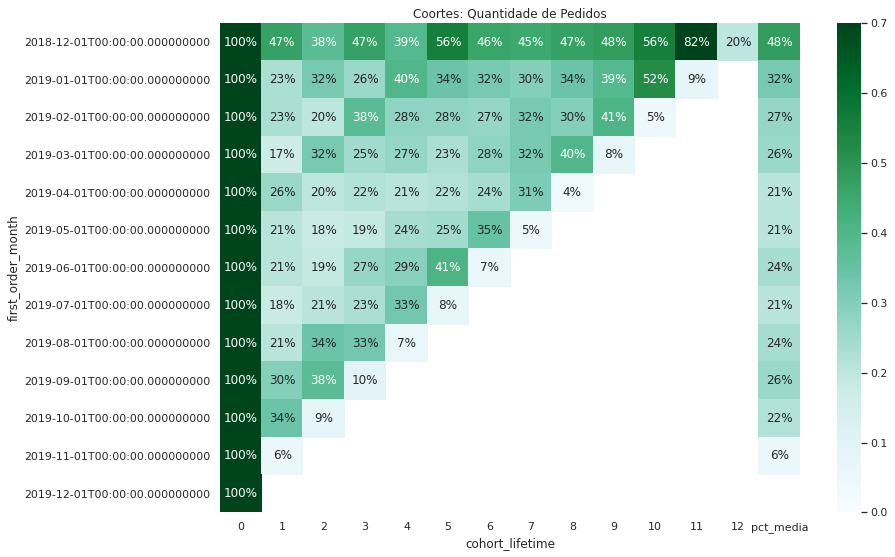

In [77]:
#Gráfico 14 - Plotando o gráfico 'Coortes: Quantidade de Pedidos'
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Coortes: Quantidade de Pedidos')
sns.heatmap(dataset_cohort_quant_pct, annot = True, fmt = '.0%', vmin = 0,vmax = 0.7,cmap = "BuGn")
plt.show()

Pelas **Tabelas 54 e 55** e pelo **Gráfico 14** nota-se o comportamento dos usuários em relação à quantidade de pedidos realizados
Verificando as cohorts horizontalmente (lifetime customer) nota-se quando os usuários estão retornando ao site. Na última coluna verifica-se a taxa média de produtos adquiridos, onde a partir do mês 3 é notado uma queda de quase 20% entre os meses, chegando a 21%, onde se mantém até o mês 11.
Analisando as cohorts verticalmente (lifetime site ou tempo de vida do site/produto - demonstra a relavância do site/produto ao longo do tempo), verifica-se que há uma estagnação em cerca de 20%-25% na quantidade de pedidos realizados a partir do terceiro mês em boa parte das cohorts;
Um fato interessante é que todas as cohorts apresentam um aumento expressivo (quando não, um valor próximo à cohort anterior) no penúltimo mês, vindo a cair drasticamente no mês seguinte.

#### Frequência de Compras no Período

In [78]:
#Tabela 57 - Agrupando as datas pela da quantidade de pedidos
datasert_order_map = dataset_cohort_quant.iloc[:,:-1].divide(dataset_cohort_map)
datasert_order_map['media'] = datasert_order_map.mean(axis=1)
datasert_order_map.replace({np.nan:' '})

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,media
first_order_month,,,,,,,,,,,,,,
2018-12-01,1.486979,1.693038,1.65,1.736334,1.624549,1.953988,1.820069,1.840426,1.871528,1.791531,1.984615,2.236277,1.267045,1.765875
2019-01-01,1.150407,1.271845,1.328467,1.25,1.381818,1.34965,1.407692,1.333333,1.275168,1.419355,1.633333,1.261905,,1.338581
2019-02-01,1.101828,1.357143,1.231884,1.441441,1.145631,1.293478,1.204301,1.280374,1.282828,1.441667,1.052632,,,1.257564
2019-03-01,1.097222,1.265625,1.350877,1.376471,1.211538,1.35443,1.189189,1.4,1.649123,1.15625,,,,1.305073
2019-04-01,1.122924,1.369231,1.15,1.136364,1.145161,1.104478,1.157143,1.292683,1.0,,,,,1.16422
2019-05-01,1.16,1.233333,1.244898,1.3,1.344262,1.225352,1.430233,1.0625,,,,,,1.250072
2019-06-01,1.111588,1.27907,1.289474,1.20339,1.275862,1.432432,1.2,,,,,,,1.255974
2019-07-01,1.121359,1.166667,1.25641,1.152174,1.425926,1.055556,,,,,,,,1.196349
2019-08-01,1.101796,1.266667,1.377778,1.270833,1.0,,,,,,,,,1.203415


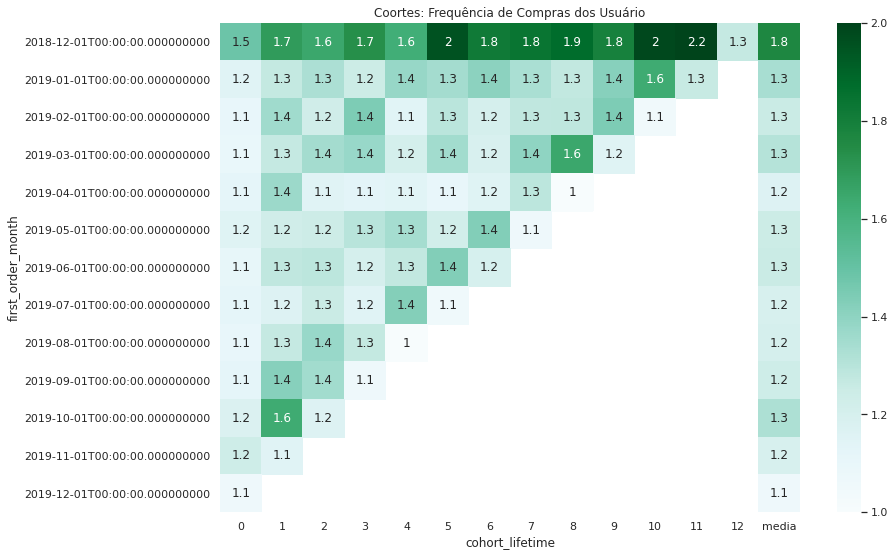

In [79]:
#Gráfico 15 - Plotando o gráfico 'Coortes: Frequência de Compras dos Usuário'
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Coortes: Frequência de Compras dos Usuário')
sns.heatmap(datasert_order_map, annot = True, vmin = 1.0,vmax = 2.0,cmap = "BuGn")
plt.show()

Pela **Tabela 56** e **Gráfico 15** plotados acima, onde indicam a relação entre o número de pedidos e o número de usuários no período. Nota-se que a relação de pedidos por cliente é positiva, onde cada cliente estaria gerando mais de um pedido no mês. Interessante que na primeira cohort, para cada usuario, foram emitidos, em média, quase 2 pedidos. Na cohort 11 o valor de pedidos por usuário ultrapassou a média, com mais de  pedidos.

#### Valor Médio e Total da Receita

In [80]:
#Tabela 58 - Agrupando as datas pelos valores de 'total_price'
dataset_cohort_purchase = dataset_cohort.pivot_table(index='first_order_month',columns='cohort_lifetime',values='total_price',aggfunc='sum').round(1)
dataset_cohort_purchase['total'] = dataset_cohort_purchase.sum(axis=1)
dataset_cohort_purchase['mean'] = dataset_cohort_purchase.mean(axis=1).round(1)
dataset_cohort_purchase.replace({np.nan:' '})

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,total,mean
first_order_month,,,,,,,,,,,,,,,
2018-12-01,477191.9,287109.9,220235.1,286576.5,187327.2,341496.9,289960.5,302617.3,355061.3,419571.3,466838.1,507129.8,138901.6,4280017.4,611431.1
2019-01-01,324560.1,57565.9,74422.2,78694.6,103216.6,86424.5,81873.6,87930.0,80914.6,128184.7,139032.6,23441.0,,1266260.4,194809.3
2019-02-01,167132.1,30030.7,36918.9,49636.6,38835.7,38199.2,48512.6,60142.8,56660.7,68372.2,5845.7,,,600287.2,100047.9
2019-03-01,185366.9,27825.4,63261.4,39666.2,52863.4,45688.3,59813.1,76460.5,66516.4,8422.0,,,,625883.6,113797.0
2019-04-01,120092.9,26908.9,23214.3,22864.8,23715.5,28103.3,32717.5,34647.4,4018.3,,,,,316282.9,63256.6
2019-05-01,129654.5,19233.5,21151.4,18738.7,28940.3,35513.4,40976.7,173508.6,,,,,,467717.1,103937.1
2019-06-01,131398.4,15969.7,12996.0,29884.6,26357.0,39665.2,4479.2,,,,,,,260750.1,65187.5
2019-07-01,91402.7,11830.1,16899.1,19690.8,20871.6,5023.5,,,,,,,,165717.8,47347.9
2019-08-01,68370.6,18074.1,35873.3,46284.0,12619.4,,,,,,,,,181221.4,60407.1


In [81]:
#Tabela 59 - Verificando os percentuais da quantidade Média de itens vendidos
dataset_cohort_purchase_ = dataset_cohort.pivot_table(index='first_order_month',columns='cohort_lifetime',values='total_price',aggfunc='sum').round(1)
dataset_cohort_pur_pct = dataset_cohort_purchase_.divide(dataset_cohort_purchase_.iloc[:,0],axis=0).round(2)
dataset_cohort_pur_pct['pct_media'] = dataset_cohort_pur_pct.iloc[:,1:].mean(axis=1).round(2)
dataset_cohort_pur_pct.replace({np.nan:' '})*100

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,pct_media
first_order_month,,,,,,,,,,,,,,
2018-12-01,100.0,60.0,46.0,60.0,39.0,72.0,61.0,63.0,74.0,88.0,98.0,106.0,29.0,66.0
2019-01-01,100.0,18.0,23.0,24.0,32.0,27.0,25.0,27.0,25.0,39.0,43.0,7.0,...,26.0
2019-02-01,100.0,18.0,22.0,30.0,23.0,23.0,29.0,36.0,34.0,41.0,3.0,...,...,26.0
2019-03-01,100.0,15.0,34.0,21.0,29.0,25.0,32.0,41.0,36.0,5.0,...,...,...,26.0
2019-04-01,100.0,22.0,19.0,19.0,20.0,23.0,27.0,29.0,3.0,...,...,...,...,20.0
2019-05-01,100.0,15.0,16.0,14.0,22.0,27.0,32.0,134.0,...,...,...,...,...,37.0
2019-06-01,100.0,12.0,10.0,23.0,20.0,30.0,3.0,...,...,...,...,...,...,16.0
2019-07-01,100.0,13.0,18.0,22.0,23.0,5.0,...,...,...,...,...,...,...,16.0
2019-08-01,100.0,26.0,52.0,68.0,18.0,...,...,...,...,...,...,...,...,41.0


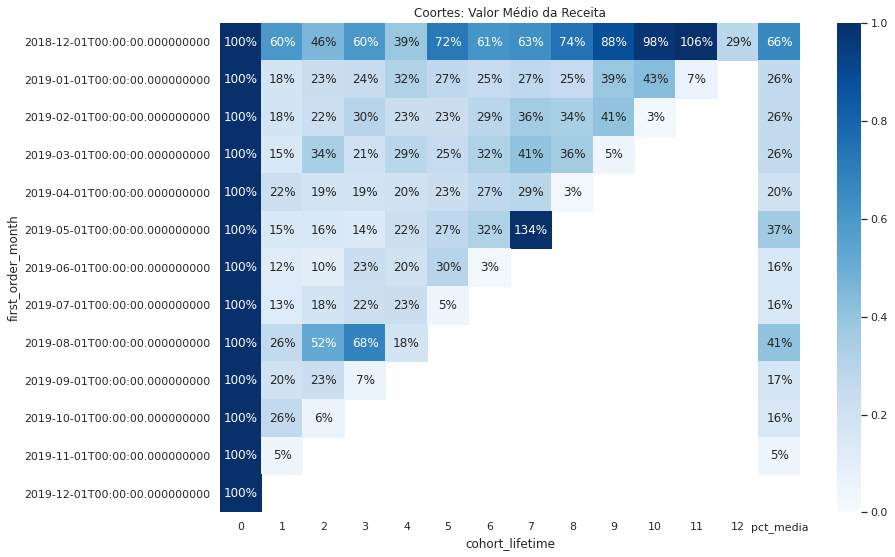

In [82]:
#Gráfico 16 - Plotando o gráfico 'Coortes: Valor Médio da Receita'
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Coortes: Valor Médio da Receita')
sns.heatmap(dataset_cohort_pur_pct, annot = True, fmt = '.0%', vmin = 0,vmax = 1.0,cmap = "Blues")
plt.show()

Conforme **Tabelas 57 e 58** e **Gráfico 16** plotados acima, nota-se o comportamento da receita do site gerada pelos usuários no período. Comparando o mesmo com **Grafico 14 - Quantidade de Pedidos** e **Gráfico 15 - Frequência de Compras dos Usuário** nota-se uma proporcionalidade entre eles, ou seja,em deteminados meses, não só a frequência diminui como também a quantidade de produtos e, consequentemente a receita é impactada. 

Interessante notar é que os meses de OUTUBRO e NOVEMBRO são os que causam o maior impacto positivo nas receitas do site, isso é verificado em todas as cohorts. Tomando como exemplo um usuário que efetuou sua primeira compra no mês *'2019-08-01'*, cerca de 58% dos usuários retornam ao site em OUTUBRO (cohort 2) e 68% em NOVEMBRO (cohort 3), onde o fluxo de usuários começa a aumentar a partir do mês de SETEMBRO, conforme **Gráfico 10** 

### A Análise RFM

Dentre os diversos modelos de Segmentação de Clientes, o modelo RFM provavelmente seja o mais utilizado na análise do comportamento do cliente. Consiste em segmentar a base de clientes em grupos homogêneos com o objetivo de entender melhor suas características e direcionar campanhas mais acertivas. 
O modelo RFM (Recência, Frequencia e Valor Monetário) é baseado no comportamento dos clientes, pois analisa seu histórico de transações - o quão frequente ou o quão recente eles compraram.O modelo RFM também ajuda a agrupar os clientes em clusters para identificar quais clientes têm a maior probabilidade de responder às campanhas de marketing.

In [83]:
#Tabela 60 - Conjunto de Dados
dataset.head()

,invoice_no,stock_code,description,quantity,unit_price,total_price,invoice_date,customer_id,date,month,day,time,hour
3857,536847,22155,STAR DECORATION RUSTIC,48,0.42,20.16,2018-12-01 09:31:00,17135,2018-12-01,12,1,09:31:00,9
3858,536847,21807,WHITE CHRISTMAS STAR DECORATION,36,0.42,15.12,2018-12-01 09:31:00,17135,2018-12-01,12,1,09:31:00,9
3859,536847,22161,HEART DECORATION RUSTIC HANGING,24,0.65,15.60,2018-12-01 09:31:00,17135,2018-12-01,12,1,09:31:00,9
3860,536847,22065,CHRISTMAS PUDDING TRINKET POT,24,1.45,34.80,2018-12-01 09:31:00,17135,2018-12-01,12,1,09:31:00,9
3861,536847,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,1.25,15.00,2018-12-01 09:31:00,17135,2018-12-01,12,1,09:31:00,9


In [84]:
#Tabela 61 - Agrupando pr 'customer_id' e pelas datas mais recentes
dataset_date = dataset[['date','customer_id']].groupby('customer_id')['date'].agg('max').reset_index()
dataset_date

,customer_id,date
0,12346,2019-01-16
1,12347,2019-12-05
2,12348,2019-09-23
3,12349,2019-11-19
4,12350,2019-01-31
...,...,...
4299,18280,2019-03-05
4300,18281,2019-06-10
4301,18282,2019-11-30
4302,18283,2019-12-04


In [85]:
#Tabela 62 - Definindo o tempo de referência
actual_time = dataset_date['date'].max() + timedelta(days=1)

# diferença dos meses
dataset_diff = dataset.groupby(['customer_id']).agg({'date':lambda x: (actual_time - x.max()).days,'invoice_no':'count','total_price':'sum'}).reset_index()
dataset_diff

,customer_id,date,invoice_no,total_price
0,12346,326,1,77183.60
1,12347,3,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40
...,...,...,...,...
4299,18280,278,10,180.60
4300,18281,181,7,80.82
4301,18282,8,12,178.05
4302,18283,4,721,2045.53


In [86]:
#Tabela 63 - Renomeando as colunas
dataset_diff.rename(columns={'date':'recency','invoice_no':'frequency','total_price':'monetary'},inplace=True)
dataset_diff

,customer_id,recency,frequency,monetary
0,12346,326,1,77183.60
1,12347,3,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40
...,...,...,...,...
4299,18280,278,10,180.60
4300,18281,181,7,80.82
4301,18282,8,12,178.05
4302,18283,4,721,2045.53


In [87]:
#Tabela 64 - Resumo estatístico dos dados
dataset_diff.describe()

,customer_id,recency,frequency,monetary
count,4304.000000,4304.000000,4304.000000,4304.000000
mean,15296.042519,90.760920,90.351766,2044.478540
std,1720.842347,97.149261,225.196509,8992.156347
min,12346.000000,1.000000,1.000000,3.750000
25%,13810.750000,18.000000,17.000000,306.525000
50%,15291.500000,51.000000,41.000000,671.825000
75%,16776.250000,138.000000,98.000000,1660.885000
max,18287.000000,372.000000,7612.000000,280986.500000


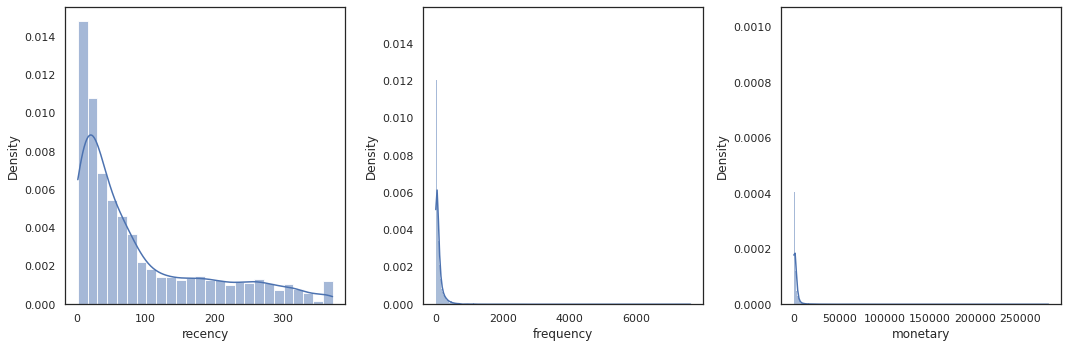

In [88]:
#Gráfico 17 - Distribuição das variáveis 'recency', 'frequency' e 'monetary'
cols = ['recency','frequency','monetary']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel() 

for col, ax in zip(cols, axes):
    sns.histplot(data=dataset_diff[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

Pelos gráficos plotados acima, nota-se uma grande quantidade de valores outliers em ambos os gráficos,exceto na variável *'recency'* o que sugere a necessidade de uma manipulação adequada para que a análise RFM não seja influenciada por esses valores.

#### Os outliers

Para verificar os valores outliers das variáveis, será aplicado o método *Z-SCORE*, que indicam o quão distante um determinado ponto se encontra da média. Por exemplo, um z-score de 3 indica que um valor está a 3 desvios padrão da média da variável.

In [89]:
#Removendo a coluna 'customer_id'
new_dataset_diff = dataset_diff[['recency','frequency','monetary','customer_id']]

#Removendo outliers
z_scores = st.zscore(new_dataset_diff)
z_scores_value = np.abs(z_scores)
filter = (z_scores_value < 3).all(axis=1)
new_dataset_diff = new_dataset_diff[filter]

In [90]:
#Tabela 65 - Reorganizando o index 
new_dataset_diff.reset_index(drop=True).head()

,recency,frequency,monetary,customer_id
0,3,182,4310.00,12347
1,76,31,1797.24,12348
2,19,73,1757.55,12349
3,311,17,334.40,12350
4,37,85,2506.04,12352


In [91]:
#Tabela 66 - Resumo estatístico dos dados
new_dataset_diff.describe()

,recency,frequency,monetary,customer_id
count,4254.000000,4254.000000,4254.000000,4254.000000
mean,91.560414,77.283028,1438.809757,15296.169958
std,97.223813,100.937609,2357.131437,1722.420896
min,1.000000,1.000000,3.750000,12347.000000
25%,19.000000,17.000000,304.250000,13807.250000
50%,51.000000,40.000000,657.265000,15296.500000
75%,139.000000,96.000000,1600.075000,16778.750000
max,372.000000,721.000000,28882.440000,18287.000000


Pelo resumo estatístico acima, nota-se que os valores extremos das colunas foram excluídos

#### Agrupando as características R-F-M

Há diversas maneiras de calcular as pontuações RFM às variáveis RFM. A maneira mais utilizada é atribuir a cada métrica pontuações baseadas em quintis de 1 a 5 com base em tamanhos de agrupamentos iguais. A vantagem desse método é a facilidade da aplicação e o entendimento para o pessoal de marketing. A desvantagem é que geralmente os conjuntos de dados sao fortemente distorcidos, podend acarretar em problemas nos resultados finais.
Para converter as variáveis RFM em pontuações, será utilizado a função *qcut()* onde o conjunto de dados é dividido em partes iguais ( no caso, 5 partes).

___

Como a função *qcut()* realiza um agrupamento com compartimentos de tamanho desigual, porém com quantidades de amostras iguais em cada grupo, será será passado os argumentos iniciais e finais, bem como o período. No caso da coluna *'recency'*, um valor menor significa uma data mais recente (retorno do usuário à plataforma) e, portanto, dee ter um valor maior.

In [92]:
#Tabela 67 - Calculando os grupos de 'recency'
new_dataset_diff['r_score'] = pd.qcut(new_dataset_diff['recency'],q=5,labels=[5,4,3,2,1])
new_dataset_diff

,recency,frequency,monetary,customer_id,r_score
1,3,182,4310.00,12347,5
2,76,31,1797.24,12348,2
3,19,73,1757.55,12349,4
4,311,17,334.40,12350,1
5,37,85,2506.04,12352,3
...,...,...,...,...,...
4299,278,10,180.60,18280,1
4300,181,7,80.82,18281,1
4301,8,12,178.05,18282,5
4302,4,721,2045.53,18283,5


Para a coluna *'frequency'* podem haver casos em que, devido a um valor aparecer muitas vezes, o mesmo pode cair em vários intervalos (usuários que realizaram somente 1 compra, por exemplo). Para isso, será utilizado o método *rank(method='first')*, onde a primeira ocorrência encontrada é atribuída como valor para o respectivo intervalo, diminuindo a incidência do problema.

In [93]:
#Tabela 68 - Calculando os grupos de 'frequency'
new_dataset_diff['f_score'] = pd.qcut(new_dataset_diff['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
new_dataset_diff

,recency,frequency,monetary,customer_id,r_score,f_score
1,3,182,4310.00,12347,5,5
2,76,31,1797.24,12348,2,3
3,19,73,1757.55,12349,4,4
4,311,17,334.40,12350,1,2
5,37,85,2506.04,12352,3,4
...,...,...,...,...,...,...
4299,278,10,180.60,18280,1,1
4300,181,7,80.82,18281,1,1
4301,8,12,178.05,18282,5,1
4302,4,721,2045.53,18283,5,5


O mesmo procedimento será aplicado à coluna *'monetary'*

In [94]:
#Tabela 69 - Calculando os grupos de 'monetary'
new_dataset_diff['m_score'] = pd.qcut(new_dataset_diff['monetary'],q=5,labels=[1,2,3,4,5])
new_dataset_diff

,recency,frequency,monetary,customer_id,r_score,f_score,m_score
1,3,182,4310.00,12347,5,5,5
2,76,31,1797.24,12348,2,3,4
3,19,73,1757.55,12349,4,4,4
4,311,17,334.40,12350,1,2,2
5,37,85,2506.04,12352,3,4,5
...,...,...,...,...,...,...,...
4299,278,10,180.60,18280,1,1,1
4300,181,7,80.82,18281,1,1,1
4301,8,12,178.05,18282,5,1,1
4302,4,721,2045.53,18283,5,5,5


In [95]:
#Tabela 70 - Infoemações Gerais do Conjunto de Dados
new_dataset_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4254 entries, 1 to 4303
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   recency      4254 non-null   int64   
 1   frequency    4254 non-null   int64   
 2   monetary     4254 non-null   float64 
 3   customer_id  4254 non-null   int64   
 4   r_score      4254 non-null   category
 5   f_score      4254 non-null   category
 6   m_score      4254 non-null   category
dtypes: category(3), float64(1), int64(3)
memory usage: 179.3 KB


In [96]:
#Tabela 71 - Concatenando as colunas 'r_score','f_score' e 'm_score'
new_dataset_diff['rfm_join'] = new_dataset_diff['r_score'].astype('str') + new_dataset_diff['f_score'].astype('str') + new_dataset_diff['m_score'].astype('str')
dataset_rfm_join = new_dataset_diff.copy()
dataset_rfm_join['rfm_join'] = dataset_rfm_join['rfm_join'].astype('str')
dataset_rfm_join.head()

,recency,frequency,monetary,customer_id,r_score,f_score,m_score,rfm_join
1,3,182,4310.00,12347,5,5,5,555
2,76,31,1797.24,12348,2,3,4,234
3,19,73,1757.55,12349,4,4,4,444
4,311,17,334.40,12350,1,2,2,122
5,37,85,2506.04,12352,3,4,5,345


#### Rotulando os dados

Conforme literatura, há diversas maneiras de rotular os segmentos RFM, desde os mais complexos, com vários rótulos para as segmentações, até os mais simples, que tentam reduzir ao máximo a quantidade de segmentações. Nesta análise será utilizada a segmentação que contém os rótulos: **'Star' - 'Loyal' -   'Potential Loyal' - 'Hold and Improve' - 'Risky'**

In [97]:
#Tabela 72 - Inserindo os rótulos conforme pontuação do rfm
dataset_rfm_seg = dataset_rfm_join.copy()  

def label_rfm_segs(rfm):

    if (rfm >= '111') & (rfm <= '155'):
        return 'Risky'
    elif (rfm >= '211') & (rfm <= '255'):
        return 'Hold and improve'    
    elif (rfm >= '311') & (rfm <= '353'):
        return 'Potential loyal'       
    elif ((rfm >= '354') & (rfm <= '454')) or ((rfm >= '511') & (rfm <= '535')) or (rfm == '541'):
        return 'Loyal'      
    elif (rfm == '455') or (rfm >= '542') & (rfm <= '555'):
        return 'Star'      
    else:
        return 'Require Activation'
  
dataset_rfm_seg['rfm_seg_name'] = dataset_rfm_seg.apply(lambda x: label_rfm_segs(x.rfm_join), axis=1)
dataset_rfm_seg.reset_index(drop=True).head()

,recency,frequency,monetary,customer_id,r_score,f_score,m_score,rfm_join,rfm_seg_name
0,3,182,4310.00,12347,5,5,5,555,Star
1,76,31,1797.24,12348,2,3,4,234,Hold and improve
2,19,73,1757.55,12349,4,4,4,444,Loyal
3,311,17,334.40,12350,1,2,2,122,Risky
4,37,85,2506.04,12352,3,4,5,345,Potential loyal


In [98]:
#Tabele 73 - Agrupando por nome de segmento e contando os usuários e suas pontuações mínimas e máximas
dt_std = dataset_rfm_seg.groupby('rfm_seg_name').agg(customers=('customer_id', 'count'),min_rfm=('rfm_join', 'min'),max_rfm=('rfm_join', 'max'),).reset_index().sort_values(by='max_rfm', ascending=False)
dt_std

,rfm_seg_name,customers,min_rfm,max_rfm
4,Star,754,455,555
1,Loyal,1083,354,541
2,Potential loyal,728,311,353
0,Hold and improve,846,211,255
3,Risky,843,111,155


Conforme **Tabela 72** acima onde foi agrupada por segmento e verificado os valores rfm_min e rfm_max, nota-se a distribuição da quantidade de usuários em cada segmento. O segmento *'Loyal'* aparece em primeiro com o maior número de usuários, porém apresentando valores de rfm medianos. Interessante nota que, mesmo o segmento *'Risky'* apresentando a terceira maior quantidade de usuários, seus valores de rfm são os piores.

In [99]:
#Tabele 74 - Agrupando por nome de segmento e as pontuações mínimas e máximas de 'recency'.'frequency' e 'monetary'
dataset_rfm_seg.groupby('rfm_seg_name').agg(min_recency=('recency', 'min'),max_recency=('recency', 'max'),min_frequency=('frequency', 'min'),max_frequency=('frequency', 'max'),min_monetary=('monetary', 'min'),max_monetary=('monetary', 'max'),).reset_index().sort_values(by='min_recency')

,rfm_seg_name,min_recency,max_recency,min_frequency,max_frequency,min_monetary,max_monetary
1,Loyal,1,72,1,656,15.00,26879.04
4,Star,1,33,56,721,251.03,28882.44
2,Potential loyal,34,72,1,213,6.20,11581.80
0,Hold and improve,73,177,1,521,13.30,11072.67
3,Risky,178,372,1,195,3.75,9864.26


In [100]:
#Tabele 75 - Agrupando por nome de segmento e as pontuações médias de 'recency'.'frequency' e 'monetary'
dataset_rfm_seg.groupby('rfm_seg_name').agg(mean_recency=('recency', 'mean'),mean_frequency=('frequency', 'mean'),mean_monetary=('monetary', 'mean')).reset_index().sort_values(by='mean_recency')

,rfm_seg_name,mean_recency,mean_frequency,mean_monetary
4,Star,10.340849,214.815650,3929.543211
1,Loyal,22.864266,69.542936,1319.134959
2,Potential loyal,52.375000,43.505495,793.948819
0,Hold and improve,114.638298,45.578014,907.618631
3,Risky,263.138790,25.201661,454.754284


De acordo com os valores das **Tabelas 73 e 74** acima, nota-se a distribuição dos valores rfm. Alguns pontos importantes valem ressaltar:
- **Recency:** Os segmentos *'Loyal' e *'Star'* aparecem com valores de recência mínima iguais (na média *'Loyal'* tem mais que o dobro de dias) e *'Risky'* apresentam os piores valores com média de 263 dias da última compra dos usuários;
- **Frequency:** O segmento *'Star'* apresenta frequência mínima (frequência de compras) bem acima dos demais (56 contra 1) bem como a frequência máxima (721). Interessante notar que o segmento *'Hold and improve'* apresenta o dobro da frequência máxima de *'Potential loyal'* , inclusive apresentando um valor de média maior. O segmento *'Risky'* mais uma vez apresentam os piores números, apresentando uma frequência média de compras bem baixa para o período;
- **Monetary:** Os segmentos *'Loyal' e *'Star'* aparecem com valores máximos próximos entre si, bem como *'Potential loyal'* e  *'Hold and improve'*; porém seus valores mínimos são bem distantes entre si (verificado pela média)

### Segmentando com K-Means

In [101]:
#Tabele 76 - Conjunto de Dodos
dataset_rfm_join.head()

,recency,frequency,monetary,customer_id,r_score,f_score,m_score,rfm_join
1,3,182,4310.00,12347,5,5,5,555
2,76,31,1797.24,12348,2,3,4,234
3,19,73,1757.55,12349,4,4,4,444
4,311,17,334.40,12350,1,2,2,122
5,37,85,2506.04,12352,3,4,5,345


Como os valores de *'Recency'*, *'Frequency'* e *'Monetary'* apresentam ordens de grandeza bem diferentes entre si (principalmente *'Monetary'*), é necessário aplicar o método *StandardScaler* afim de que o algoritmo K-means não supervalorize essa variável em detrimento das demais, evitando distorções na análise.

In [102]:
#Tabela 77 - Padronizando os dados

columns = ['recency','frequency','monetary']
dataset_diff_std = dataset_rfm_join.copy()

# Padronizaçãoa
scaler = StandardScaler()
scaler.fit(dataset_rfm_join[columns])
std_columns = scaler.transform(dataset_rfm_join[columns])
dataset_diff_std[columns] = std_columns
dataset_diff_std.reset_index(drop=True)

,recency,frequency,monetary,customer_id,r_score,f_score,m_score,rfm_join
0,-0.910999,1.037565,1.218230,12347,5,5,5,555
1,-0.160066,-0.458585,0.152080,12348,2,3,4,234
2,-0.746411,-0.042437,0.135240,12349,4,4,4,444
3,2.257321,-0.597301,-0.468595,12350,1,2,2,122
4,-0.561250,0.076462,0.452820,12352,3,4,5,345
...,...,...,...,...,...,...,...,...
4249,1.917858,-0.666659,-0.533851,18280,1,1,1,111
4250,0.920043,-0.696384,-0.576187,18281,1,1,1,111
4251,-0.859566,-0.646842,-0.534933,18282,5,1,1,511
4252,-0.900713,6.378125,0.257428,18283,5,5,5,555


Antes da aplicação do algoritmo K-means, é necessário escolher o número de clusters (conjuntos) de forma otimizada. Para isso será aplicado o método Elbow, afim de encontrar o número de clusters adequndo ao conjunto de dados. 

In [103]:
#Ajustando o valor de k-means de 1 a 10

kmeans_kwargs = {"init" : "random","n_init" : 10}
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dataset_diff_std[columns])
    sse.append(kmeans.inertia_)

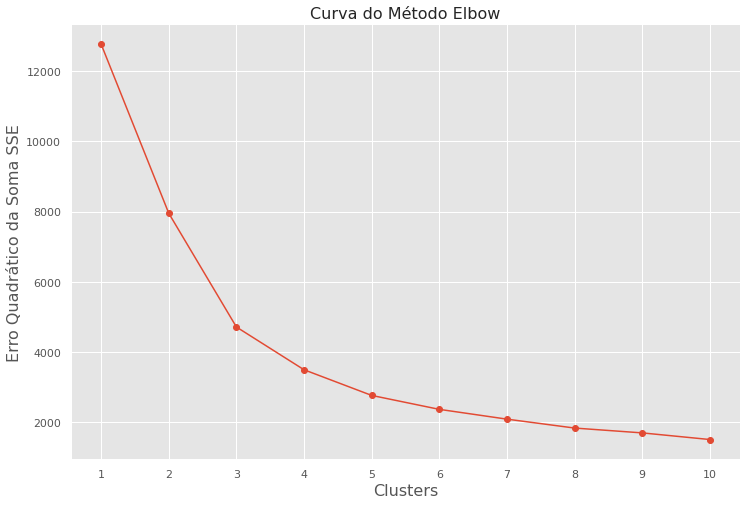

In [104]:
#Gráfico 19 - Plotando a curva do Método Elbow
plt.style.use("ggplot")
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse, marker='o')

plt.xticks(range(1,11))
plt.ylabel('Erro Quadrático da Soma SSE', fontsize=16)
plt.xlabel('Clusters', fontsize=16)
plt.title("Curva do Método Elbow",size=16)

plt.show()

Pelo gráfico acima, nota-se que pelo comportamento da curva, os valores de 3 e 4 são possíveis, devido as inclinações da curva antes e depois desses pontos. Portanto será selecionado o valor 4.

In [105]:
#Aplicando o algritmo K-Means

# feature columns
columns = ['recency','frequency','monetary']

kmeans_f = {"init" : "random","n_init" : 10}

kmeans = KMeans(n_clusters=4, **kmeans_f)
kmeans.fit(dataset_diff_std[columns])
dataset_diff_std['cluster'] = kmeans.labels_
dataset_rfm_join['cluster'] = kmeans.labels_

In [106]:
#Tabela 78 - Conjunto de dados clusterizado 
dataset_diff_std.reset_index(drop=True).head()

,recency,frequency,monetary,customer_id,r_score,f_score,m_score,rfm_join,cluster
0,-0.910999,1.037565,1.218230,12347,5,5,5,555,1
1,-0.160066,-0.458585,0.152080,12348,2,3,4,234,2
2,-0.746411,-0.042437,0.135240,12349,4,4,4,444,2
3,2.257321,-0.597301,-0.468595,12350,1,2,2,122,3
4,-0.561250,0.076462,0.452820,12352,3,4,5,345,2


In [107]:
#Tabela 79 - Conjunto de dados não padronizado (StandardScaler)
dataset_rfm_join.reset_index(drop=True).head()

,recency,frequency,monetary,customer_id,r_score,f_score,m_score,rfm_join,cluster
0,3,182,4310.00,12347,5,5,5,555,1
1,76,31,1797.24,12348,2,3,4,234,2
2,19,73,1757.55,12349,4,4,4,444,2
3,311,17,334.40,12350,1,2,2,122,3
4,37,85,2506.04,12352,3,4,5,345,2


In [108]:
#Tabele 80 - Agrupando por nome de segmento e contando os usuários e suas pontuações mínimas e máximas
dataset_diff_std.groupby(['cluster']).agg(customers=('customer_id', 'count'),min_rfm=('rfm_join', 'min'),max_rfm=('rfm_join', 'max'),).reset_index().sort_values(by='min_rfm')

,cluster,customers,min_rfm,max_rfm
3,3,1013,111,255
0,0,93,145,555
2,2,2586,211,555
1,1,562,235,555


In [109]:
#Tabele 81 - Agrupando por cluster e as pontuações mínimas e máximas de 'recency'. 'frequency' e 'monetary'
dataset_rfm_join.groupby('cluster').agg(min_recency=('recency', 'min'),max_recency=('recency', 'max'),min_frequency=('frequency', 'min'),max_frequency=('frequency', 'max'),min_monetary=('monetary', 'min'),max_monetary=('monetary', 'max'),).reset_index().sort_values(by='min_recency')

,cluster,min_recency,max_recency,min_frequency,max_frequency,min_monetary,max_monetary
0,0,1,212,9,721,6493.54,28882.44
1,1,1,170,27,721,578.61,9068.26
2,2,1,158,1,191,6.20,7374.90
3,3,142,372,1,195,3.75,7033.07


In [110]:
#Tabele 82 - Agrupando por cluster e as pontuações mínimas e máximas de 'recency'. 'frequency' e 'monetary'
dataset_rfm_join.groupby('cluster').agg(mean_recency=('recency', 'mean'),mean_frequency=('frequency', 'mean'),mean_monetary=('monetary', 'mean')).reset_index().sort_values(by='mean_recency')

,cluster,mean_recency,mean_frequency,mean_monetary
0,0,16.537634,337.548387,13336.921946
1,1,25.238434,250.624555,3602.167687
2,2,48.089714,50.455143,930.063887
3,3,246.215202,25.707799,445.014325


In [111]:
#Tabele 83 - Agrupando por cluster e calculando a média de 'recency', 'frequency' e 'moneary'
dataset_std_rfm = dataset_diff_std.drop('customer_id', axis=1).reset_index(drop=True)

dataset_diff_std_centr = dataset_std_rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].agg({'recency': 'mean', 'frequency': 'mean', 'monetary':'mean'}).T.reset_index()
dataset_diff_std_centr

cluster,index,0,1,2,3
0,recency,-0.771741,-0.682238,-0.447172,1.590896
1,frequency,2.578781,1.717515,-0.265818,-0.511022
2,monetary,5.048302,0.917901,-0.215858,-0.421662


In [112]:
#Tabele 84 - Agrupando por nome de segmento e as pontuações médias de 'recency'.'frequency' e 'monetary'
dataset_rfm_seg.groupby('rfm_seg_name').agg(mean_recency=('recency', 'mean'),mean_frequency=('frequency', 'mean'),mean_monetary=('monetary', 'mean')).reset_index().sort_values(by='mean_recency')

,rfm_seg_name,mean_recency,mean_frequency,mean_monetary
4,Star,10.340849,214.815650,3929.543211
1,Loyal,22.864266,69.542936,1319.134959
2,Potential loyal,52.375000,43.505495,793.948819
0,Hold and improve,114.638298,45.578014,907.618631
3,Risky,263.138790,25.201661,454.754284


/tmp/ipykernel_45/1816168304.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = dataset_diff_std_centr["index"], rotation = 90)


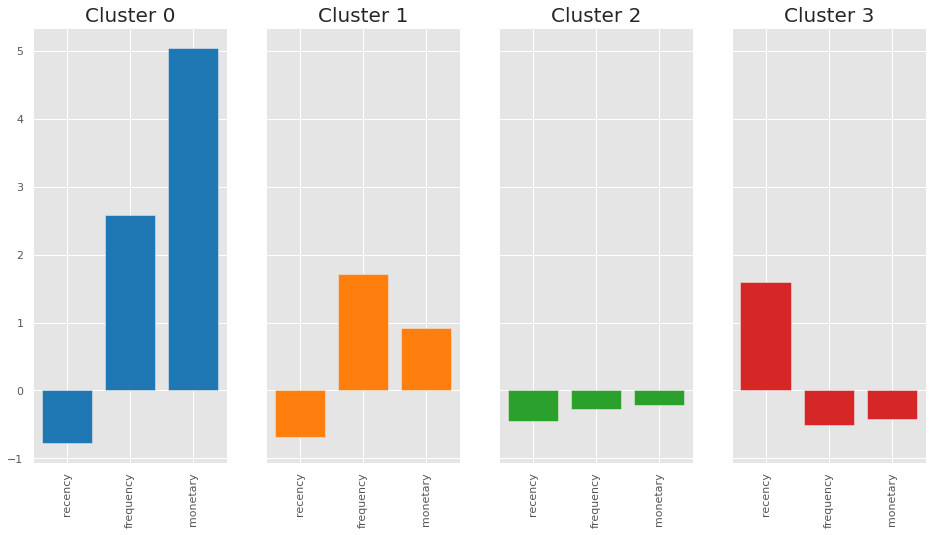

In [113]:
#Gráfico 20 - Plotando os clusters separadamente
#,'tab:gray','tab:brown'
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig, ax = plt.subplots(1,4,figsize = (16,8),sharey = True, sharex = True)
axis = ax.flatten()

for i, col in enumerate(dataset_diff_std_centr):
    if col !="index":
        ax=axis[i-1]
        ax.bar(height = dataset_diff_std_centr[col], x=dataset_diff_std_centr['index'], color = colors [i-1])
        ax.set_xticklabels(labels = dataset_diff_std_centr["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)  

Do **'Gráfico - 20'** plotado acima referente aos clusters, pode-se inferir que:

- **Cluster 0:** Segmento equivalente ao *'Loyal'*. Apresentam as mesmas características dos usuários do **Cluster 2**, com recência baixa e frequência alta, porém com um baixo retorno financeiro (provavelmente esses usuários comprem muito e com alta frequência itens de baixo valor agregado);
- **Cluster 1:** é o pior segmento, apresentando o maior valor de recência (intervalo entre as compras) e também apresenta baixa frequência de compras (cerca de 25 compras/dia em média). É também o que apresenta o menor valor monetário e o segundo maior em volume de usuários. É equivalente ao grupo *'Risky'* do RFM. Possui cerca de 1014 usuários (segundo maior grupo);
- **Cluster 2:** o principal segmento de usuários (equivalente ao grupo *'Star'* do RFM). São compradores regulares e atuais (recência baixa e frequência alta) bem como os mais rentáveis, apresentando o maior valor 'monetary' dos grupos. De acordo com a **Tabela 78** há somente 86 deles (cerca de 3% do total de usuários). Sua transação mais recente foi há 16 dias;
- **Cluster 3:** Segmento que apresenta um comportamento que junta o equivalente de *'Potential loyal'* e *'Hold and improve'*, onde apresentam recência e frequência regulares. Apresenta o maior número de usuários, com cerca de 2624 e apresenta uma frequência de compras média de 45 compras/dia. 

## Conclusão

O objetivo do projeto é a segmentação de usuários com base em seu seu perfil consumidor e uma posterior análise dos resultados.

No capitulo 1 foi carregado a base de dados e bibliotecas que foram utilizadas na análise.

No capítulo 2 foi verificado nos conjuntos de dados:
  - os valores ausentes e duplicados
  - descrição dos dados
  - informações gerais
  - itens com valor = 0
  - itens com valor negativo
  - renomeação das colunas

No capítulo 3 foi feita a análise de todo o conjunto de dados, onde foram verificado tópicos como:
  - Distribuição de usuários por diversidade de itens comprados;
  - Distribuição Diária de itens por usuário;
  - Quantidade de Itens Únicos por Mês, Dia e Hora;
  - Valor Total de Compras por mês, Dia e Hora
  
No capítulo 4 foi feita a Segmentação de Clientes, com o intuito de agrupar usuários com base em características comuns entre sí. Optou-se por dois tipos de segmentação:
   - a segmentação temporal, aplicando a Análise Cohort, onde verifica-se o comportamento do usuário ao longo do tempo;
   - a segmentação comportamental, aplicando a Segmentação RFM e a clusterização K-means, com o intuito de agrupar usuários com comportamentos semelhantes e, assim, promover campanhas mais acertivas;
   
Na Análise Cohort foram erificados métricas como:
- **Usuários Ativos:** qual o percentual de clientes que voltam a fazer compras no site;
- **Quantidade de Pedidos:** verificar a variação da quatidade de pedidos;
- **Frequência de Compras:** quantas vezes (em média) por mês os clientes compram;
- **Valor Médio da Receita:** variação da receita média no período

Já na Análise RFM (Recência, Frequência e Valor Monetário) foi adotado o método de pontuação baseado em quintis de 1 a 5, com base nos grupos de tamanhos iguais.De acordo com os valores das **Tabelas 73 e 74** acima, nota-se a distribuição dos valores rfm. Alguns pontos importantes valem ressaltar:
- **Recency:** Os segmentos *'Loyal' e *'Star'* aparecem com valores de recência mínima iguais (na média *'Loyal'* tem mais que o dobro de dias) e *'Risky'* apresentam os piores valores com média de 263 dias da última compra dos usuários;
- **Frequency:** O segmento *'Star'* apresenta frequência mínima (frequência de compras) bem acima dos demais (56 contra 1) bem como a frequeência máxima (721). Interessnate notar que o segmento *'Hold and improve'* apresenta o dobro da frequência máxima de *'Potential loyal'* , inclusive apresentando um valor de média maior. O segmento *'Risky'* mais uma vez apresentam os piores números, apresentando uma frequência média de compras bem baixa para o período;
- **Monetary:** Os segmentos *'Loyal' e *'Star'* aparecem com valores máximos próximos entre si, bem como  *'Potential loyal'* e  *'Hold and improve'*; porém seus valores mínimos são bem distantes entre si (verificado pela média)

Na Segmentação aplicando o algoritmo K-means, iniciou-se aplicando o método *StandardScaler* afim de padronizar os valores de *'Recency'*, *'Frequency'* e *'Monetary'* devido às diferenças em suas ordens de grandezas. Na escolha da quantidade de clusters foi aplicado o método *Elbow* que, pelo comportamento  e inclinação da curva, adotou-se o valor 4.

Pelo exposto acima, algumas sugestões podem ser adotadas pelo Marketing:

- Os usuários do **Cluster 0:** (segmento que apresenta um comportamento que junta o equivalente de *'Potential loyal'* e *'Hold and improve'*), são os usuários que apresentam um comportamento mediano, com uma frequência média de 45 compras/dia e 2624 usuários. Como esse segmento já apresenta uma recência baixa, uma abordagem interessante seria envolvê-los em promoções de curto prazo para aumentar a frequência de compras.

- Para os usuários do **Cluster 1:** (equivalente ao *'Risky'* do RFM) são os usuários que necessitam de mais atenção devido a quantidade. Como apresentam baixa recência e baixa frequência, o interessante aqui seria envolvê-los com promoções do tipo Voucher ou com produtos promocionais via emalis e mensagems para que haja um aumento na frequência de compras e, assim, um engajamento maior.

- Para os usuários do **Cluster 2** (equivalente ao grupo *'Star'* do RFM) são os usuários mais importantes da carteira de clientes. Como já são clientes fiéis à marca, a ideia é não sobrecarregá-los com emails e mensagens de promoções, economizando tempo e recursos para investimento em outros grupos. Uma possibilidade seria pensar em algo como um **Cartão Fidelidade**

- Já para os usuários do **Cluster 3:** (segmento equivalente ao *'Loyal'* do RFM) são aqueles usuários que apresentam boas métricas de recência e frequência, ou seja, compram com uma certa frequência e em curtos períodos, porém comValor Monetário baixo, muito provavelmente suas compras sejam de baixo valor agregado. Aqui a abordagem seria envolvê-los em Programas de Fidelidade com produtos selecionados de maior valor;

**Apresentação:** https://drive.google.com/file/d/1Kxs2ciz2GeXTHy4tnORACPcmYFevrlMG/view?usp=sharing

## Referências Bibliográficas

1. FORBES - Customer Segmentation: The Ultimate Guide - https://www.forbes.com/advisor/business/customer-segmentation/)
2. RFM analysis for Customer Segmentation - https://clevertap.com/blog/rfm-analysis/
3. A quick guide to the RFM model for data scientists - https://practicaldatascience.co.uk/data-science/a-quick-guide-to-the-rfm-model
4. RFM Analysis For Successful Customer Segmentation - https://www.putler.com/rfm-analysis/
5. Oztaysi, B. and Kavi, M., 2020, July. Fuzzy RFM Analysis: An Application in E-Commerce. In International Conference on Intelligent and Fuzzy Systems (pp. 1225-1232). Springer, Cham.
6. RFM ranking – An effective approach to customer segmentation - https://www.sciencedirect.com/science/article/pii/S1319157818304178
7. ResearchGate - Customer Segmentation in E- Commerce - https://www.researchgate.net/publication/355166048_Customer_Segmentation_in_E-_Commerce
8. Medium - Using RFM Analysis for Effective Customer Segmentation in Marketing - https://medium.com/@yennhi95zz/using-rfm-analysis-for-effective-customer-segmentation-in-marketing-4964a99bf606
9. Medium - RFM with Python (Study Case: Ecommerce Dataset) - https://medium.com/@katarinanimas20/rfm-with-python-study-case-ecommerce-dataset-8327e09fce99
10. Medium - Data-Driven Customer Segmentation: RFM and CLTV Analysis Using Python - https://medium.com/@abdullahorzan/data-driven-customer-segmentation-rfm-and-cltv-analysis-using-python-4238b11bd740
11. Medium - Customer Segmentation using RFM Analysis in Python - https://medium.com/@ugursavci/customer-segmentation-using-rfm-analysis-in-python-218a3255f714
12. Analytics Yogi - Elbow Method vs Silhouette Score – Which is Better? - https://vitalflux.com/elbow-method-silhouette-score-which-better/